<a href="https://colab.research.google.com/github/ngcheeyuan/Learner-s-Repo-for-Tensorflow/blob/main/10_Tensorflow_Deep_learning_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TIme series froecasting fundamentals with Tensorflow:

Reference : https://github.com/mrdbourke/tensorflow-deep-learning

In [1]:
## historical price of bitcoin up to 2021-05-18
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-01-21 08:17:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-01-21 08:17:32 (7.52 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'], # pass a list of columns that you want to change to datetime format
                 index_col = ['Date'])

In [3]:
df.head(5)

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
len(df),df.tail(1),df.head(1)

(2787,
            Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2021-05-18      BTC         43144.471291  ...    46622.853437    42102.34643
 
 [1 rows x 5 columns],
            Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2013-10-01      BTC            123.65499  ...       124.75166      122.56349
 
 [1 rows x 5 columns])

### Deep learning often requires alot of data, however time series problems often run into this problem where there are samller sample size

In [5]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns = {'Closing Price (USD)':'Price'})

In [6]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


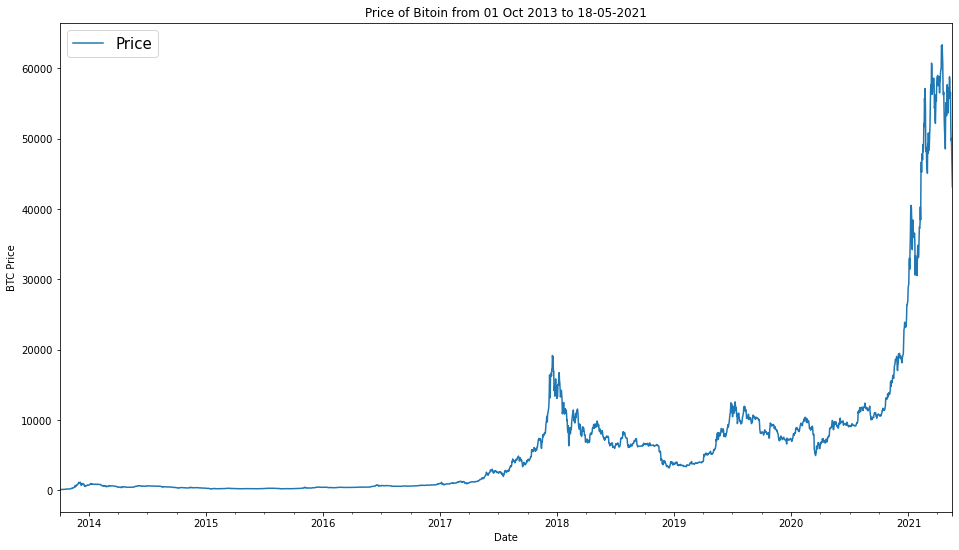

In [7]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize = (16,9))
plt.ylabel('BTC Price')
plt.title('Price of Bitoin from 01 Oct 2013 to 18-05-2021')
plt.legend(fontsize = 15);

## Importing time series data with Python's CSV module

In [8]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv','r') as f:
  csv_reader = csv.reader(f,delimiter = ',')
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # get the dates as dates and not strings
    btc_price.append(float(line[2])) # get the closing price as float

In [9]:
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'BTC prices from Oct 2013 to May 2021')

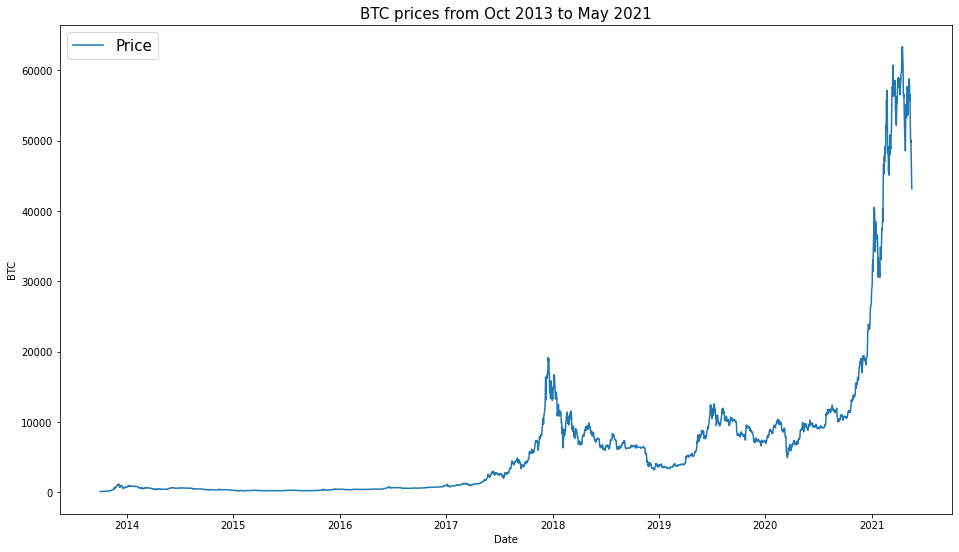

In [10]:
plt.figure(figsize = (16,9))
plt.plot(timesteps , btc_price, label = 'Price')
plt.ylabel('BTC')
plt.xlabel('Date')
plt.legend(fontsize = 15)
plt.title('BTC prices from Oct 2013 to May 2021', fontsize = 15)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()
split_size = int(0.8*len(prices))

In [13]:
X_train, y_train = timesteps[:split_size],prices[:split_size]
X_test , y_test = timesteps[split_size:], prices[split_size:]

Text(0.5, 1.0, 'BTC prices from Oct 2013 to May 2021')

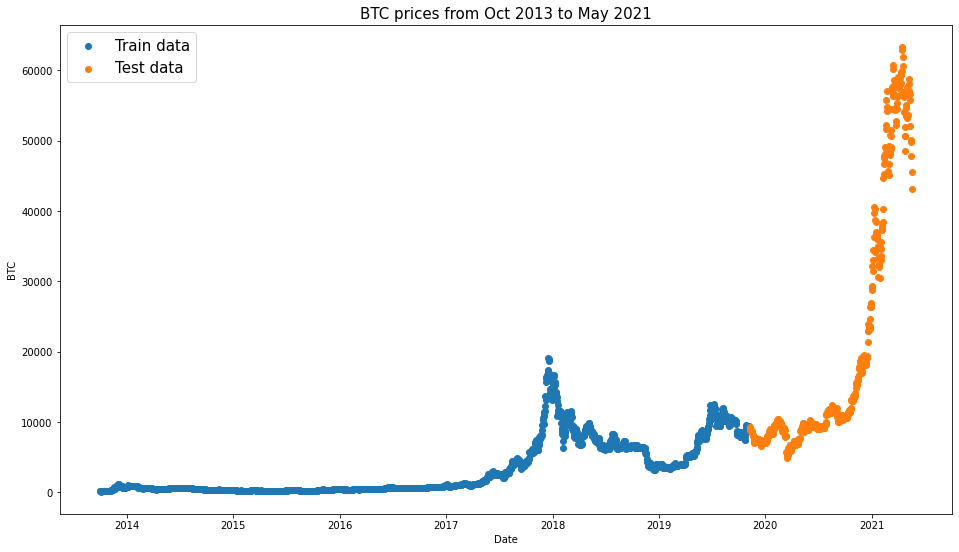

In [14]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train , label = 'Train data')
plt.scatter(X_test,y_test, label = 'Test data')
plt.ylabel('BTC')
plt.xlabel('Date')
plt.legend(fontsize = 15)
plt.title('BTC prices from Oct 2013 to May 2021', fontsize = 15)

In [15]:
## Create a plotting function

def plot_time_series(timesteps,values,format = '.', start = 0 , end = None , label = None):
  '''
  Plots timesteps against values

  Parameters:
  ----------
  timesteps: array of timestep values
  value: array of values accross time
  format : stype of plot, default : .
  start : where to start the plot
  end : where to end the plot
  label : label to show on plot about values
  '''

  plt.plot(timesteps[start:end],values[start:end], marker = format,label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

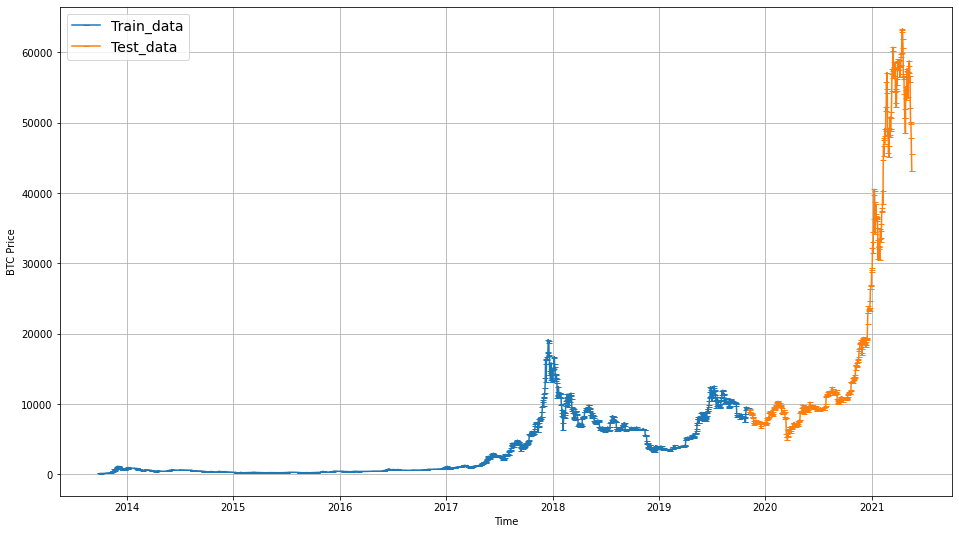

In [16]:
plt.figure(figsize = (16,9))
plot_time_series(timesteps = X_train, values = y_train , format = '_',label = 'Train_data')
plot_time_series(timesteps = X_test, values = y_test , format = '_',label = 'Test_data')

## Modelling experiments:

horizon = number of timesteps into the future you're going to predict

window size = number of timesteps we're going to use to predict horizon

0. Naive Forecast Model(baseline)
1. Dense Model , horizon = 1 , window = 7
2. Same as model 1, horizon = 1 , window = 7
3. Same as model 1, horizon = 1 , window = 30
4. Conv1D
5. LSTM
6. Same as model 1 (but with multivariate data)
7. N-BEATS algorithmn
8. Ensemble
9. Future Prediction model
10. Same as model 1 (but with turkey data introduced)

## Model 0 : Naive Forecast Model

$$\hat{y}_{t}= y_{t-1}$$

In [20]:
naive_forecast = y_test[:-1]

In [21]:
naive_forecast[:10] , naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [22]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

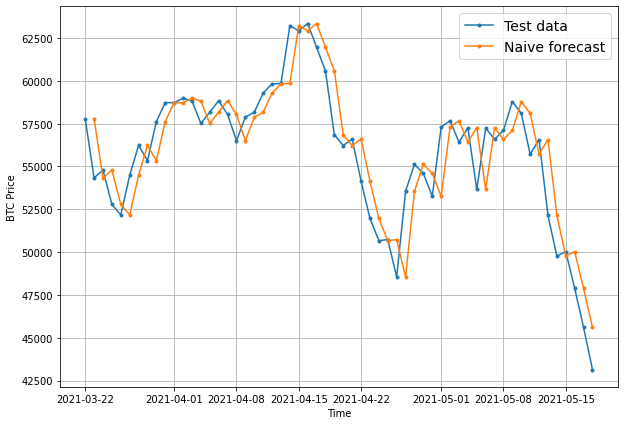

In [23]:
plt.figure(figsize = (10,7))
#plot_time_series(timesteps = X_train, values = y_train , label = 'Train data')
plot_time_series(timesteps = X_test , values = y_test, start = 500, label = 'Test data')
plot_time_series(timesteps = X_test[1:] , values = naive_forecast ,start = 500, label = 'Naive forecast')

## Time series forecasting evaluation metrics:
MAE, 

MSE,

RMSE, 

MAPE (mean absolute percentage error) - not recommended by Hyndman & Koehler, 

MASE(Mean absolute scaled error)

In [24]:
import tensorflow as tf

In [25]:
def mean_absolute_scaled_error(y_true , y_pred):
  '''
  Implement MASE assuming no seasonality
  '''

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [26]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [27]:
y_true = y_test[1:]
y_pred = y_test[:-1]
tf.reduce_sum((y_true - y_pred)/y_true)

<tf.Tensor: shape=(), dtype=float64, numpy=1.1418991598721486>

In [28]:
def time_series_metrics(y_true,y_pred):
  '''
  Returns MAE, MSE , RMSE, MAPE/SMAPE/MAE
  '''

  #Make sure float 32 datatype for metric calculations
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  #calculate various evaluation metrics
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mse = tf.reduce_mean(tf.square(y_true-y_pred))
  rmse = tf.sqrt(mse)
  mape = tf.reduce_sum((y_true - y_pred)/y_true)
  smape = tf.reduce_mean(200*(tf.abs(y_true-y_pred)/(y_true+y_pred)))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  mase = mae/mae_naive_no_season
  smape_2 = tf.metrics.mean_absolute_percentage_error(y_true,y_pred)

  if smape_2.ndim > 0:
    smape_2 = tf.reduce_mean(smape_2)

  return {'MAE':mae.numpy(),
          'MSE':mse.numpy(),
          'RMSE':rmse.numpy(),
          'MAPE':mape.numpy(),
          'sMAPE_2':smape_2.numpy(),
          'sMAPE':smape.numpy(),
          'MASE':mase.numpy()}

In [29]:
baseline_results = time_series_metrics(y_true = y_test[1:],
                                       y_pred = naive_forecast)
baseline_results

{'MAE': 567.9802,
 'MAPE': 1.1418995,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'sMAPE': 2.5180573,
 'sMAPE_2': 2.516525}

## Other Models you can use for time series:

Model/Library Name: Resource

Moving average:	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

ARIMA (Autoregression Integrated Moving Average): 	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

sktime: (Scikit-Learn for time series) 	https://github.com/alan-turing-institute/sktime

TensorFlow: Decision Forests (random forest, gradient boosting trees) 	https://www.tensorflow.org/decision_forests

Facebook Kats:(purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats

LinkedIn Greykite:(flexible, intuitive and fast forecasts) 	https://github.com/linkedin/greykite

## Setting up window functions

In [31]:
HORIZON = 1 
WINDOW_SIZE = 7

In [32]:
def get_labelled_windows(x,horizon = HORIZON):
  '''
  Create labels for windowed dataset.

  E.g. if horizon = 1
  Input = [0,1,2,3,4,5,6,7] -> Ouput =([0,1,2,3,4,5,6],[7])
  '''
  return x[:,:-horizon],x[:,-horizon:]


reference : https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5

In [33]:
import numpy as np
def make_windows(x , window_size = WINDOW_SIZE , horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon),axis = 0)

  #Create a 2D array of multiple window steps(minus 1 to account for 0 indexing)
  window_indexes = window_step +np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis = 0).T # create 2D array of size = window_size
  #index on the target array with 2D array of multiple window steps
  window_array = x[window_indexes]
  
  #get the labelled windows
  window , labels = get_labelled_windows(window_array,horizon = horizon)

  return window,labels

## Turning windows into training and test sets

In [34]:
def make_train_test_splits(x
                           ,window_size = WINDOW_SIZE 
                           ,horizon = HORIZON
                           ,test_split = 0.2):
  
  windows,labels = make_windows(x,window_size = window_size , horizon = horizon)
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows,test_windows,train_labels,test_labels

In [32]:
train_windows,val_windows,train_labels,val_labels = make_train_test_splits(prices)

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performance against the other's best performances.



In [167]:
import os
def create_model_checkpoint(model_name , save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path,model_name),
                                            save_best_only = True,
                                            verbose = 0)

In [34]:
from tensorflow.keras import layers

In [35]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [layers.Dense(128 , activation ='relu'),
     layers.Dense(HORIZON, activation = 'linear')],
     name = 'model_1_linear'
)

model_1.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x = train_windows,
            y=  train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data = (val_windows, val_labels),
            callbacks = [create_model_checkpoint('model_1_linear')])

Epoch 1/100
18/18 [==============================] - 3s 47ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 30ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 29ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 31ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 29ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 1s 31ms/step - loss: 158.5

In [36]:
baseline_results

{'MAE': 567.9802,
 'MAPE': 1.1418992,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'sMAPE': 2.5180576,
 'sMAPE_2': 2.516525}

In [37]:
model_1.evaluate(val_windows,val_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [38]:
# Load in saved best performing model_1

In [39]:
model_1 = tf.keras.models.load_model('model_experiments/model_1_linear')

In [40]:
model_1.evaluate(val_windows,val_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

In [41]:
model_1_preds = model_1.predict(val_windows)

In [42]:
model_1_results = time_series_metrics(y_true = tf.squeeze(val_labels),
                                      y_pred = tf.squeeze(model_1_preds))

In [43]:
baseline_results

{'MAE': 567.9802,
 'MAPE': 1.1418992,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'sMAPE': 2.5180576,
 'sMAPE_2': 2.516525}

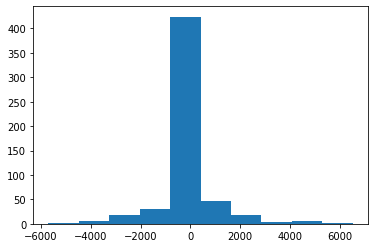

In [44]:
plt.hist(np.array(tf.squeeze(model_1_preds))-np.array(tf.squeeze(val_labels)));

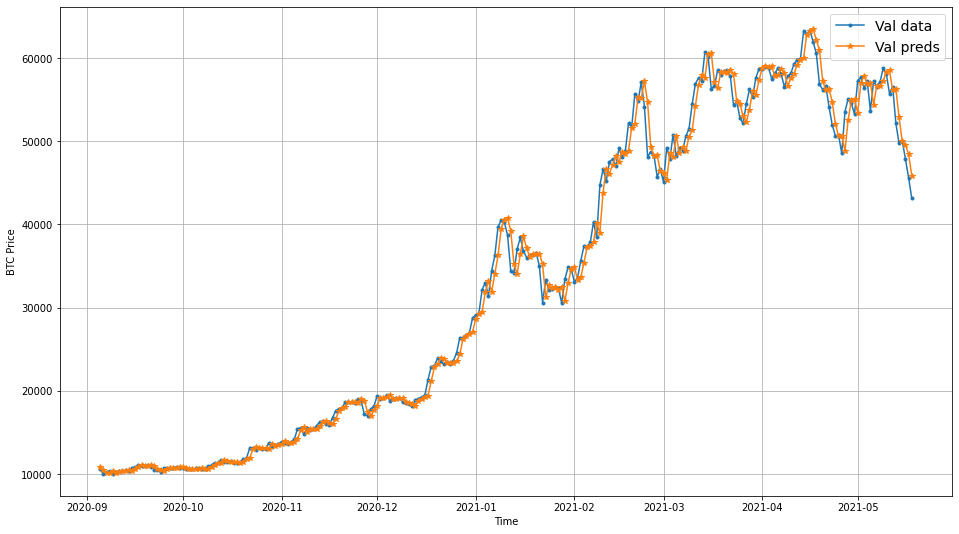

In [45]:
offset = 300
plt.figure(figsize=(16,9))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = val_labels[:,0],
                 start = offset,
                 label = 'Val data')
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = '*',
                 label = 'Val preds')

In [46]:
#Model 2 Dense (window = 30 , Horizon = 1)

In [47]:
train_windows,val_windows,train_labels,val_labels = make_train_test_splits(prices,
                                                                           window_size = 30,
                                                                           horizon = 1)

In [48]:
len(train_windows)

2205

In [49]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    layers.Dense(128,activation = 'relu'),
    layers.Dense(HORIZON , activation ='linear')
], name = 'model_2')

In [50]:
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

In [51]:
model_2.fit(x = train_windows,
            y = train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (val_windows,val_labels),
            callbacks = [create_model_checkpoint(model_name = 'model_2_30days_window')])

Epoch 1/100
18/18 [==============================] - 1s 35ms/step - loss: 1097.0399 - mae: 1097.0399 - mse: 4741506.0000 - val_loss: 3900.2537 - val_mae: 3900.2537 - val_mse: 32752730.0000
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 428.0732 - mae: 428.0732 - mse: 811548.2500 - val_loss: 1587.0745 - val_mae: 1587.0745 - val_mse: 6817661.5000
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 279.7655 - mae: 279.7655 - mse: 363083.0625 - val_loss: 1220.6888 - val_mae: 1220.6888 - val_mse: 4447002.0000
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 224.3637 - mae: 224.3637 - mse: 225072.2188 - val_loss: 1160.1572 - val_mae: 1160.1572 - val_mse: 3837504.2500
Epoch 5/100
18/18 [==============================] - 1s 31ms/step - loss: 187.9681 - mae: 187.9681 - mse: 173777.0312 - val_loss: 1007.6487 - val_mae: 1007.6487 - val_mse: 3224229.0000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss

In [52]:
model_2  = tf.keras.models.load_model('model_experiments/model_2_30days_window/')

In [53]:
model_2.evaluate(val_windows,val_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741 - mae: 605.8741 - mse: 1273360.7500


[605.8740844726562, 605.8740844726562, 1273360.75]

In [54]:
model_2_preds = tf.squeeze(model_2.predict(val_windows))

In [55]:
model_2_results = time_series_metrics(y_true = tf.squeeze(val_labels),
                                      y_pred = model_2_preds)

In [56]:
model_2_results

{'MAE': 605.8741,
 'MAPE': 0.21015656,
 'MASE': 1.0590738,
 'MSE': 1273360.8,
 'RMSE': 1128.4329,
 'sMAPE': 2.71782,
 'sMAPE_2': 2.726445}

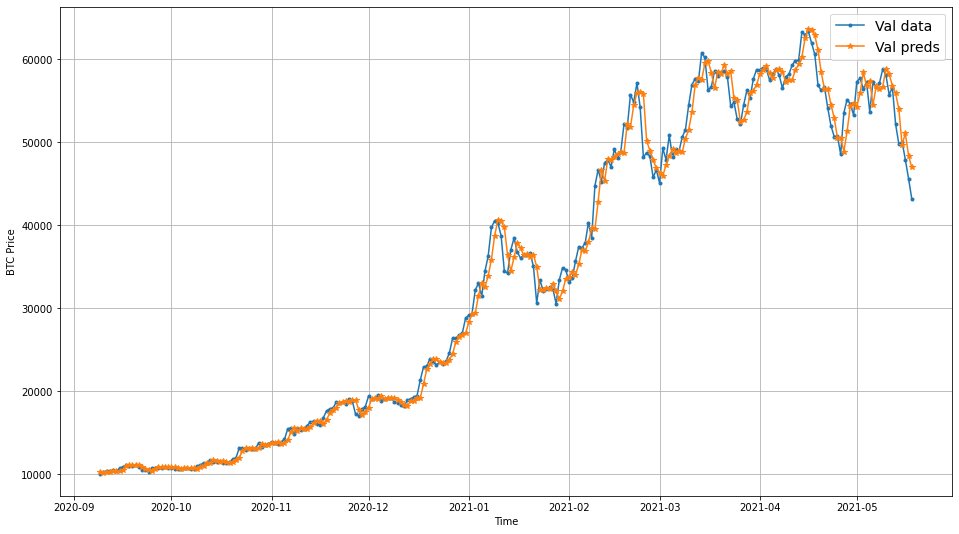

In [57]:
offset = 300
plt.figure(figsize=(16,9))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = val_labels[:,0],
                 start = offset,
                 label = 'Val data')
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = '*',
                 label = 'Val preds')

In [58]:
## Model 3 : Window = 30 , Horizon = 7

In [59]:
WINDOW_SIZE = 30
HORIZON = 7

In [60]:
train_windows,val_windows,train_labels,val_labels = make_train_test_splits(x = prices,
                                                                           window_size = WINDOW_SIZE,
                                                                           horizon = HORIZON)

In [61]:
model_3  = tf.keras.Sequential([
                                layers.Dense(128,activation = 'relu'),
                                layers.Dense(HORIZON,activation = 'linear')
], name = 'model_3_window_30_horizon_7')

In [62]:
model_3.compile(loss = tf.keras.losses.mean_absolute_error,
                metrics = ['mae','mse'],
                optimizer = tf.keras.optimizers.Adam())

In [63]:
model_3.fit(x = train_windows,
            y = train_labels,
            batch_size = 128,
            epochs =  100,
            verbose = 1,
            validation_data = (val_windows,val_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 39ms/step - loss: 1755.8939 - mae: 1755.8939 - mse: 13708834.0000 - val_loss: 3986.9456 - val_mae: 3986.9456 - val_mse: 54289792.0000
Epoch 2/100
18/18 [==============================] - 1s 31ms/step - loss: 550.2391 - mae: 550.2391 - mse: 1330859.6250 - val_loss: 2158.2322 - val_mae: 2158.2322 - val_mse: 12997529.0000
Epoch 3/100
18/18 [==============================] - 1s 30ms/step - loss: 415.7840 - mae: 415.7840 - mse: 825040.1875 - val_loss: 2030.4072 - val_mae: 2030.4072 - val_mse: 12232812.0000
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 379.9277 - mae: 379.9277 - mse: 701433.5625 - val_loss: 1933.2146 - val_mae: 1933.2146 - val_mse: 11123688.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 355.7990 - mae: 355.7990 - mse: 617779.1250 - val_loss: 1962.0751 - val_mae: 1962.0751 - val_mse: 11232692.0000
Epoch 6/100
18/18 [==============================] - 1s 30ms/step 

In [64]:
model_3 = tf.keras.models.load_model('model_experiments/model_3_window_30_horizon_7/')

In [65]:
model_3.evaluate(x = val_windows, y = val_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.3538 - mae: 1237.3538 - mse: 5384458.0000


[1237.353759765625, 1237.353759765625, 5384458.0]

In [66]:
model_3_preds = tf.squeeze(model_3.predict(val_windows))

In [67]:
model_3_preds.shape , val_labels.shape

(TensorShape([551, 7]), (551, 7))

In [68]:
model_3_results = time_series_metrics(y_true = tf.squeeze(val_labels),
                                      y_pred = tf.squeeze(model_3_preds))

In [69]:
model_3_results

{'MAE': 1237.3538,
 'MAPE': -28.485159,
 'MASE': 2.2018018,
 'MSE': 5384457.0,
 'RMSE': 2320.443,
 'sMAPE': 5.462806,
 'sMAPE_2': 5.5646167}

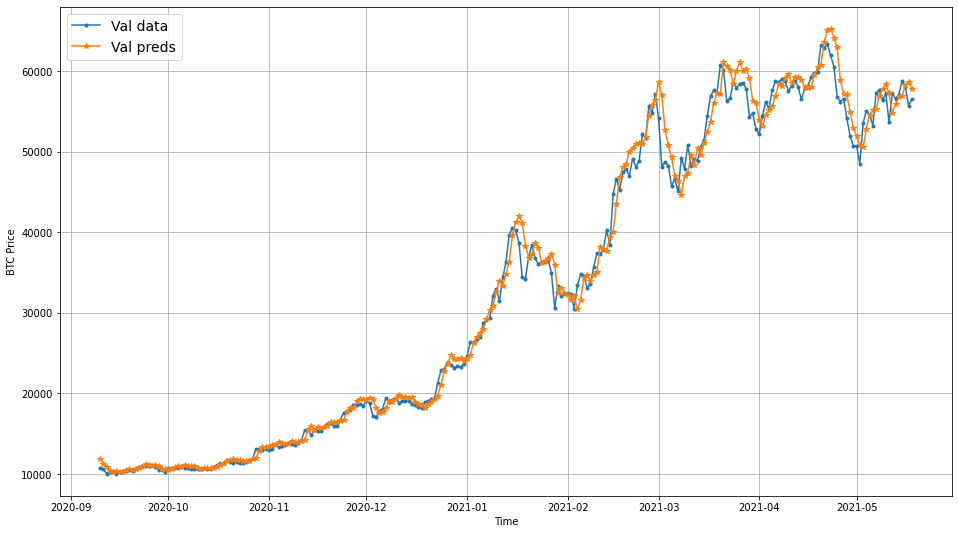

In [70]:
offset = 300
plt.figure(figsize=(16,9))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = val_labels[:,0],
                 start = offset,
                 label = 'Val data')
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = tf.reduce_mean(model_3_preds,axis = 1),
                 start = offset,
                 format = '*',
                 label = 'Val preds')

In [71]:
 model_results =  pd.DataFrame({'naive_modelt':baseline_results,
                                'model_1':model_1_results,
                                'model_2':model_2_results,
                                'model_3':model_3_results,}).T

Text(0, 0.5, 'SMAPE')

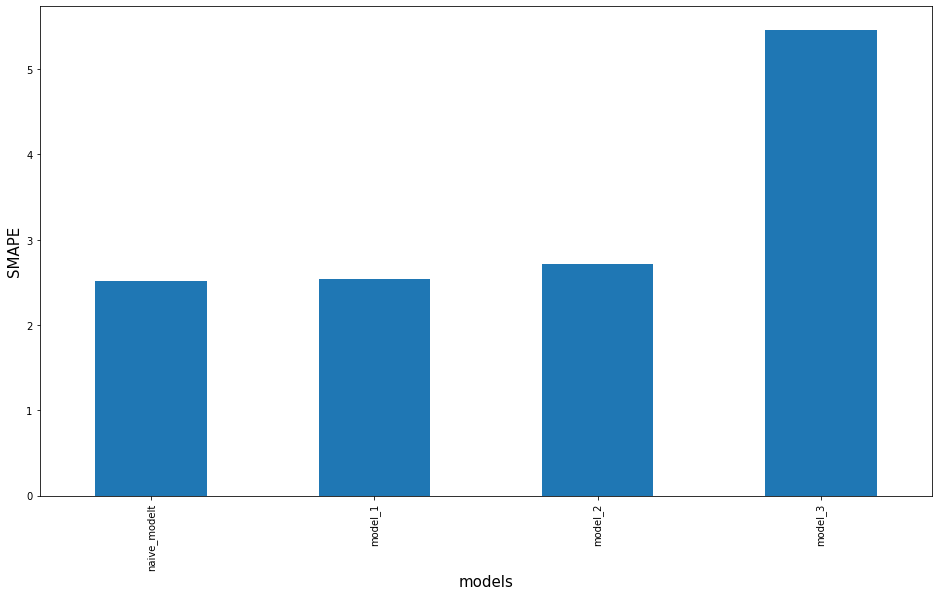

In [72]:
fontsize = 15
plt.figure(figsize = (16,9))
model_results.sort_values(by = 'sMAPE', ascending = True)['sMAPE'].plot(kind = 'bar')
plt.xlabel('models' , fontsize = fontsize )
plt.ylabel('SMAPE', fontsize = fontsize)

## Model 4 : Conv1D 

In [73]:
HORIZON = 1
WINDOW_SIZE = 7

In [74]:
train_windows , val_windows, train_labels , val_labels = make_train_test_splits(x = prices,
                                                                                horizon = HORIZON,
                                                                                window_size = WINDOW_SIZE)

In [75]:
## To use Conv1D layer, we need an input of (batch_size , timesteps, input_dim)

In [76]:
train_windows[0].shape

(7,)

In [77]:
x = tf.constant(train_windows[0])

In [78]:
expand_dims_layer = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [79]:
expand_dims_layer(x),expand_dims_layer(x).shape

(<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
 array([[123.65499],
        [125.455  ],
        [108.58483],
        [118.67466],
        [121.33866],
        [120.65533],
        [121.795  ]], dtype=float32)>, TensorShape([7, 1]))

In [80]:
tf.random.set_seed(42)

In [81]:
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x , axis = 1)),
    layers.Conv1D(filters = 128, kernel_size = 7, strides = 1 , padding = 'causal' , activation = 'relu'),
    layers.Dense(HORIZON , activation = 'linear')
], name = 'model_4_conv1D')

model_4.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_4.fit(x = train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (val_windows,val_labels),
            callbacks = [create_model_checkpoint(model_name = model_4.name)])

Epoch 1/100
18/18 [==============================] - 9s 58ms/step - loss: 1486.8540 - mae: 1486.8540 - mse: 7163934.0000 - val_loss: 1494.0684 - val_mae: 1494.0684 - val_mse: 6783190.5000
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 359.4668 - mae: 359.4668 - mse: 516577.5625 - val_loss: 1882.3083 - val_mae: 1882.3083 - val_mse: 8488888.0000
Epoch 3/100
18/18 [==============================] - 1s 42ms/step - loss: 237.6437 - mae: 237.6437 - mse: 276178.0000 - val_loss: 1228.2827 - val_mae: 1228.2827 - val_mse: 4507090.0000
Epoch 4/100
18/18 [==============================] - 1s 41ms/step - loss: 208.5991 - mae: 208.5991 - mse: 216257.3906 - val_loss: 1095.6581 - val_mae: 1095.6581 - val_mse: 4010961.0000
Epoch 5/100
18/18 [==============================] - 1s 41ms/step - loss: 197.1485 - mae: 197.1485 - mse: 201763.0156 - val_loss: 1087.9990 - val_mae: 1087.9990 - val_mse: 3871239.7500
Epoch 6/100
18/18 [==============================] - 1s 55ms/step - loss:

In [82]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [83]:
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D/')

In [84]:
model_4_preds = model_4.predict(val_windows)

In [85]:
model_4_results = time_series_metrics(y_true = tf.squeeze(val_labels),
                                      y_pred = tf.squeeze(model_4_preds))

In [86]:
model_4_results, baseline_results

({'MAE': 570.7388,
  'MAPE': 0.56086755,
  'MASE': 1.00263,
  'MSE': 1183499.9,
  'RMSE': 1087.8878,
  'sMAPE': 2.542912,
  'sMAPE_2': 2.5461204},
 {'MAE': 567.9802,
  'MAPE': 1.1418992,
  'MASE': 0.99957,
  'MSE': 1147547.0,
  'RMSE': 1071.2362,
  'sMAPE': 2.5180576,
  'sMAPE_2': 2.516525})

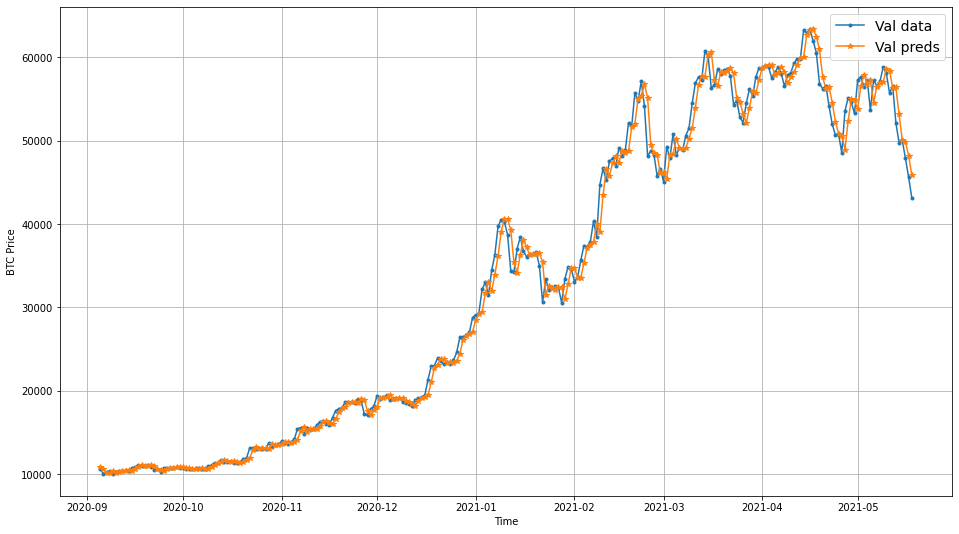

In [87]:
offset = 300
plt.figure(figsize=(16,9))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = val_labels[:,0],
                 start = offset,
                 label = 'Val data')
plot_time_series(timesteps = X_test[-len(val_windows):],
                 values = tf.reduce_mean(model_4_preds,axis = 1),
                 start = offset,
                 format = '*',
                 label = 'Val preds')

## Model 5 : RNN(LSTM)

In [88]:
tf.random.set_seed(42)

In [89]:
inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x , axis = 1))(inputs)
#x = layers.LSTM(128, return_sequences= True)(x)
x = layers.LSTM(128 , activation = 'relu')(x)
x = layers.Dense(32, activation = 'relu')(x)
output = layers.Dense(HORIZON, activation = 'linear')(x)

model_5 = tf.keras.Model(inputs = inputs,
                         outputs = output, 
                         name = 'Model_5_LSTM')

In [90]:
model_5.compile(loss = tf.keras.losses.mean_absolute_error,
                metrics = ['mae','mse'],
                optimizer = tf.keras.optimizers.Adam())

In [91]:
model_5.fit(x = train_windows,
            y = train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (val_windows , val_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
10/18 [===============>..............] - ETA: 0s - loss: 2780.9111 - mae: 2780.9111 - mse: 18983068.0000 INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 4s 142ms/step - loss: 2430.3960 - mae: 2430.3960 - mse: 14903145.0000 - val_loss: 9471.2344 - val_mae: 9471.2344 - val_mse: 158901040.0000
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 861.8209 - mae: 861.8209 - mse: 2289628.5000  INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 653.4048 - mae: 653.4048 - mse: 1568161.7500 - val_loss: 1945.4353 - val_mae: 1945.4353 - val_mse: 9762402.0000
Epoch 3/100
10/18 [===============>..............] - ETA: 0s - loss: 226.3457 - mae: 226.3457 - mse: 226338.4688INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 217.8997 - mae: 217.8997 - mse: 207374.3594 - val_loss: 993.6396 - val_mae: 993.6396 - val_mse: 3328137.5000
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 182.8415 - mae: 182.8415 - mse: 171049.2031 - val_loss: 1053.0714 - val_mae: 1053.0714 - val_mse: 3671617.2500
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 190.1530 - mae: 190.1530 - mse: 179113.8281INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 130ms/step - loss: 180.3832 - mae: 180.3832 - mse: 163175.5781 - val_loss: 969.9511 - val_mae: 969.9511 - val_mse: 3151509.0000
Epoch 6/100
18/18 [==============================] - 0s 8ms/step - loss: 177.2040 - mae: 177.2040 - mse: 164382.4062 - val_loss: 993.2447 - val_mae: 993.2447 - val_mse: 3312152.7500
Epoch 7/100
11/18 [=================>............] - ETA: 0s - loss: 180.7314 - mae: 180.7314 - mse: 181361.8281INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 171.0074 - mae: 171.0074 - mse: 155179.8281 - val_loss: 929.4769 - val_mae: 929.4769 - val_mse: 2962843.2500
Epoch 8/100
18/18 [==============================] - 0s 8ms/step - loss: 159.0419 - mae: 159.0419 - mse: 128064.7734 - val_loss: 1168.5238 - val_mae: 1168.5238 - val_mse: 3475360.5000
Epoch 9/100
10/18 [===============>..............] - ETA: 0s - loss: 167.4785 - mae: 167.4785 - mse: 133229.3125INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 168.5740 - mae: 168.5740 - mse: 144432.1250 - val_loss: 905.4762 - val_mae: 905.4762 - val_mse: 2759273.5000
Epoch 10/100
11/18 [=================>............] - ETA: 0s - loss: 161.4026 - mae: 161.4026 - mse: 135460.7188INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 131ms/step - loss: 164.0249 - mae: 164.0249 - mse: 146491.8438 - val_loss: 891.4745 - val_mae: 891.4745 - val_mse: 2648230.5000
Epoch 11/100
10/18 [===============>..............] - ETA: 0s - loss: 155.0343 - mae: 155.0343 - mse: 140653.2031INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 157.4556 - mae: 157.4556 - mse: 134033.7656 - val_loss: 890.4639 - val_mae: 890.4639 - val_mse: 2696585.7500
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 158.9950 - mae: 158.9950 - mse: 136742.4219 - val_loss: 921.4206 - val_mae: 921.4206 - val_mse: 2638524.2500
Epoch 13/100
18/18 [==============================] - ETA: 0s - loss: 155.6899 - mae: 155.6899 - mse: 133208.5156INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 155.6899 - mae: 155.6899 - mse: 133208.5156 - val_loss: 877.0350 - val_mae: 877.0350 - val_mse: 2494428.0000
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 152.9771 - mae: 152.9771 - mse: 129134.3594 - val_loss: 889.6005 - val_mae: 889.6005 - val_mse: 2480423.5000
Epoch 15/100
11/18 [=================>............] - ETA: 0s - loss: 149.1857 - mae: 149.1857 - mse: 122200.8047INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 133ms/step - loss: 151.8184 - mae: 151.8184 - mse: 127687.8984 - val_loss: 841.4518 - val_mae: 841.4518 - val_mse: 2331935.2500
Epoch 16/100
 9/18 [==============>...............] - ETA: 0s - loss: 148.8584 - mae: 148.8584 - mse: 116108.2734INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 148.1449 - mae: 148.1449 - mse: 122406.8516 - val_loss: 827.9001 - val_mae: 827.9001 - val_mse: 2259273.7500
Epoch 17/100
11/18 [=================>............] - ETA: 0s - loss: 152.8709 - mae: 152.8709 - mse: 131234.8906INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 147.5420 - mae: 147.5420 - mse: 120644.4609 - val_loss: 809.1055 - val_mae: 809.1056 - val_mse: 2185181.5000
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 144.4244 - mae: 144.4244 - mse: 116781.1641 - val_loss: 812.9083 - val_mae: 812.9082 - val_mse: 2140261.0000
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 141.3988 - mae: 141.3988 - mse: 113146.3047 - val_loss: 817.4680 - val_mae: 817.4680 - val_mse: 2112827.5000
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 146.5864 - mae: 146.5864 - mse: 122874.0000INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 132ms/step - loss: 142.1871 - mae: 142.1871 - mse: 113725.2656 - val_loss: 784.3423 - val_mae: 784.3423 - val_mse: 2084486.8750
Epoch 21/100
10/18 [===============>..............] - ETA: 0s - loss: 147.2452 - mae: 147.2452 - mse: 114247.7500INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 140.3873 - mae: 140.3873 - mse: 111531.0156 - val_loss: 758.4402 - val_mae: 758.4402 - val_mse: 1934916.1250
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 149.2474 - mae: 149.2474 - mse: 126277.5234INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 137.4955 - mae: 137.4955 - mse: 106837.7266 - val_loss: 753.2953 - val_mae: 753.2953 - val_mse: 1874041.5000
Epoch 23/100
10/18 [===============>..............] - ETA: 0s - loss: 131.1417 - mae: 131.1417 - mse: 88432.1562INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 129ms/step - loss: 134.0226 - mae: 134.0226 - mse: 102512.6797 - val_loss: 741.0139 - val_mae: 741.0139 - val_mse: 1820947.6250
Epoch 24/100
11/18 [=================>............] - ETA: 0s - loss: 131.7637 - mae: 131.7637 - mse: 106846.4453INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 132.9690 - mae: 132.9690 - mse: 100604.2266 - val_loss: 729.3610 - val_mae: 729.3610 - val_mse: 1773483.1250
Epoch 25/100
11/18 [=================>............] - ETA: 0s - loss: 139.0503 - mae: 139.0503 - mse: 108567.0000INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 131.2256 - mae: 131.2256 - mse: 98424.4141 - val_loss: 718.9528 - val_mae: 718.9529 - val_mse: 1728198.8750
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 134.8365 - mae: 134.8365 - mse: 92875.1172INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 130.8747 - mae: 130.8747 - mse: 96670.5156 - val_loss: 709.4251 - val_mae: 709.4251 - val_mse: 1719334.6250
Epoch 27/100
10/18 [===============>..............] - ETA: 0s - loss: 131.8124 - mae: 131.8124 - mse: 104905.6250INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 135ms/step - loss: 128.8624 - mae: 128.8624 - mse: 95826.1250 - val_loss: 699.1089 - val_mae: 699.1089 - val_mse: 1670551.5000
Epoch 28/100
18/18 [==============================] - 0s 8ms/step - loss: 126.5246 - mae: 126.5246 - mse: 91979.8672 - val_loss: 701.8398 - val_mae: 701.8398 - val_mse: 1622586.7500
Epoch 29/100
18/18 [==============================] - 0s 8ms/step - loss: 125.6415 - mae: 125.6415 - mse: 91172.2812 - val_loss: 699.3660 - val_mae: 699.3660 - val_mse: 1601741.8750
Epoch 30/100
 9/18 [==============>...............] - ETA: 0s - loss: 121.7905 - mae: 121.7905 - mse: 79772.2656 INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 129.7657 - mae: 129.7657 - mse: 92923.4297 - val_loss: 695.6400 - val_mae: 695.6400 - val_mse: 1583075.6250
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 128.2078 - mae: 128.2078 - mse: 89466.7578 - val_loss: 721.2807 - val_mae: 721.2807 - val_mse: 1644992.5000
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 125.5405 - mae: 125.5405 - mse: 84814.3516INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 124.2796 - mae: 124.2796 - mse: 90172.8906 - val_loss: 672.4564 - val_mae: 672.4564 - val_mse: 1518079.3750
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 128.4724 - mae: 128.4724 - mse: 90007.6328 - val_loss: 720.0610 - val_mae: 720.0610 - val_mse: 1733624.8750
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 133.1573 - mae: 133.1573 - mse: 101418.9297INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 131ms/step - loss: 127.1336 - mae: 127.1336 - mse: 89467.9297 - val_loss: 665.6751 - val_mae: 665.6751 - val_mse: 1486784.8750
Epoch 35/100
 9/18 [==============>...............] - ETA: 0s - loss: 120.1602 - mae: 120.1602 - mse: 77435.3828INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 122.5629 - mae: 122.5629 - mse: 87893.4844 - val_loss: 653.0281 - val_mae: 653.0281 - val_mse: 1477372.5000
Epoch 36/100
18/18 [==============================] - 0s 9ms/step - loss: 123.3550 - mae: 123.3550 - mse: 86177.5547 - val_loss: 686.5794 - val_mae: 686.5794 - val_mse: 1530435.8750
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 123.3908 - mae: 123.3908 - mse: 86713.9219 - val_loss: 664.0300 - val_mae: 664.0300 - val_mse: 1522712.3750
Epoch 38/100
11/18 [=================>............] - ETA: 0s - loss: 127.0048 - mae: 127.0048 - mse: 91446.0234INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 121.4523 - mae: 121.4523 - mse: 86608.5938 - val_loss: 649.2108 - val_mae: 649.2108 - val_mse: 1457886.7500
Epoch 39/100
18/18 [==============================] - 0s 8ms/step - loss: 121.7496 - mae: 121.7496 - mse: 85474.6562 - val_loss: 665.5979 - val_mae: 665.5979 - val_mse: 1520660.1250
Epoch 40/100
11/18 [=================>............] - ETA: 0s - loss: 116.1615 - mae: 116.1615 - mse: 81106.9453 INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 114ms/step - loss: 119.1824 - mae: 119.1824 - mse: 84564.6875 - val_loss: 648.0321 - val_mae: 648.0321 - val_mse: 1420758.2500
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 124.5667 - mae: 124.5667 - mse: 89986.1797INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 133ms/step - loss: 119.9158 - mae: 119.9158 - mse: 84781.3516 - val_loss: 635.7198 - val_mae: 635.7198 - val_mse: 1404186.2500
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 121.2074 - mae: 121.2074 - mse: 86115.7812 - val_loss: 648.1931 - val_mae: 648.1931 - val_mse: 1414475.8750
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 118.2034 - mae: 118.2034 - mse: 80830.0078 - val_loss: 648.7488 - val_mae: 648.7488 - val_mse: 1456488.5000
Epoch 44/100
11/18 [=================>............] - ETA: 0s - loss: 115.6276 - mae: 115.6276 - mse: 76133.8906INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 118.6505 - mae: 118.6505 - mse: 81300.6094 - val_loss: 629.4711 - val_mae: 629.4711 - val_mse: 1379816.2500
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 117.6644 - mae: 117.6644 - mse: 81779.9375 - val_loss: 642.1152 - val_mae: 642.1152 - val_mse: 1392924.5000
Epoch 46/100
18/18 [==============================] - 0s 8ms/step - loss: 119.7524 - mae: 119.7524 - mse: 82842.9062 - val_loss: 654.7820 - val_mae: 654.7820 - val_mse: 1470439.5000
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 120.5276 - mae: 120.5276 - mse: 83947.5391 - val_loss: 673.0721 - val_mae: 673.0721 - val_mse: 1465781.6250
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 117.1148 - mae: 117.1148 - mse: 79749.8359 - val_loss: 664.7014 - val_mae: 664.7014 - val_mse: 1443330.7500
Epoch 49/100
10/18 [===============>..............] - ETA: 0s - loss: 127.0682 - mae: 127.0682 - mse:

INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 119.5236 - mae: 119.5236 - mse: 80519.3281 - val_loss: 622.4902 - val_mae: 622.4902 - val_mse: 1344196.8750
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 114.9516 - mae: 114.9516 - mse: 79509.1562 - val_loss: 623.7269 - val_mae: 623.7269 - val_mse: 1360549.2500
Epoch 51/100
10/18 [===============>..............] - ETA: 0s - loss: 110.8145 - mae: 110.8145 - mse: 79062.1250INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 130ms/step - loss: 114.3848 - mae: 114.3848 - mse: 78617.1094 - val_loss: 618.2129 - val_mae: 618.2129 - val_mse: 1330922.6250
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 115.1563 - mae: 115.1563 - mse: 79958.9531 - val_loss: 624.9448 - val_mae: 624.9448 - val_mse: 1364825.6250
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 117.8964 - mae: 117.8964 - mse: 80173.8906 - val_loss: 632.3378 - val_mae: 632.3378 - val_mse: 1356041.5000
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 117.1641 - mae: 117.1641 - mse: 79559.5078 - val_loss: 669.3771 - val_mae: 669.3771 - val_mse: 1439969.1250
Epoch 55/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3468 - mae: 118.3468 - mse: 80432.7422 - val_loss: 621.0544 - val_mae: 621.0544 - val_mse: 1356304.7500
Epoch 56/100
18/18 [==============================] - 0s 7ms/step - loss: 113.6534 - mae: 113.6534 - 

INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 115.6549 - mae: 115.6549 - mse: 78488.6875 - val_loss: 610.1492 - val_mae: 610.1492 - val_mse: 1294643.8750
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 114.5808 - mae: 114.5808 - mse: 76711.8672 - val_loss: 681.4188 - val_mae: 681.4188 - val_mse: 1441726.2500
Epoch 65/100
10/18 [===============>..............] - ETA: 0s - loss: 115.4137 - mae: 115.4137 - mse: 79541.8281 INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 112ms/step - loss: 115.5729 - mae: 115.5729 - mse: 77756.1094 - val_loss: 603.0079 - val_mae: 603.0079 - val_mse: 1291702.3750
Epoch 66/100
11/18 [=================>............] - ETA: 0s - loss: 110.1752 - mae: 110.1752 - mse: 64355.1016INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 131ms/step - loss: 113.4928 - mae: 113.4928 - mse: 75508.5391 - val_loss: 600.1566 - val_mae: 600.1566 - val_mse: 1276234.8750
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 111.5437 - mae: 111.5437 - mse: 74039.2422 - val_loss: 682.8725 - val_mae: 682.8725 - val_mse: 1518950.5000
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 116.9227 - mae: 116.9227 - mse: 74729.8438 - val_loss: 753.1811 - val_mae: 753.1811 - val_mse: 1739288.7500
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 130.0684 - mae: 130.0684 - mse: 86935.9531 - val_loss: 700.8271 - val_mae: 700.8271 - val_mse: 1568267.0000
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 122.5142 - mae: 122.5142 - mse: 82433.9844 - val_loss: 607.0978 - val_mae: 607.0978 - val_mse: 1301189.8750
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 114.7674 - mae: 114.7674 - 

INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 113.1536 - mae: 113.1536 - mse: 76160.7188 - val_loss: 594.1144 - val_mae: 594.1144 - val_mse: 1260921.8750
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 110.8790 - mae: 110.8790 - mse: 73841.2266 - val_loss: 613.1907 - val_mae: 613.1907 - val_mse: 1283408.2500
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 113.0247 - mae: 113.0247 - mse: 75667.0859 - val_loss: 609.0197 - val_mae: 609.0197 - val_mse: 1301093.1250
Epoch 77/100
11/18 [=================>............] - ETA: 0s - loss: 117.9964 - mae: 117.9964 - mse: 81573.0703INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 119ms/step - loss: 111.6977 - mae: 111.6977 - mse: 73462.1875 - val_loss: 593.4573 - val_mae: 593.4573 - val_mse: 1256116.2500
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0261 - mae: 112.0261 - mse: 74215.6953 - val_loss: 594.2038 - val_mae: 594.2038 - val_mse: 1251106.2500
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 110.9509 - mae: 110.9509 - mse: 75511.3203 - val_loss: 603.3112 - val_mae: 603.3112 - val_mse: 1284582.5000
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6534 - mae: 110.6534 - mse: 74080.4453 - val_loss: 594.0740 - val_mae: 594.0740 - val_mse: 1245397.3750
Epoch 81/100
10/18 [===============>..............] - ETA: 0s - loss: 110.3296 - mae: 110.3296 - mse: 76484.5469INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 131ms/step - loss: 109.2804 - mae: 109.2804 - mse: 72806.4062 - val_loss: 592.2505 - val_mae: 592.2505 - val_mse: 1241503.2500
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 114.0045 - mae: 114.0045 - mse: 76725.3984 - val_loss: 612.0264 - val_mae: 612.0264 - val_mse: 1271524.8750
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5310 - mae: 115.5310 - mse: 76830.1875 - val_loss: 619.4868 - val_mae: 619.4868 - val_mse: 1319685.1250
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 112.9926 - mae: 112.9926 - mse: 73248.4609 - val_loss: 597.4677 - val_mae: 597.4677 - val_mse: 1264304.0000
Epoch 85/100
11/18 [=================>............] - ETA: 0s - loss: 105.1680 - mae: 105.1680 - mse: 64925.8711INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 109.9677 - mae: 109.9677 - mse: 73708.0312 - val_loss: 585.8746 - val_mae: 585.8746 - val_mse: 1229039.8750
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7232 - mae: 109.7232 - mse: 72707.5703 - val_loss: 662.7658 - val_mae: 662.7658 - val_mse: 1373446.6250
Epoch 87/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5220 - mae: 110.5220 - mse: 71129.2656 - val_loss: 587.2042 - val_mae: 587.2042 - val_mse: 1236158.1250
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 110.5512 - mae: 110.5512 - mse: 73978.1719 - val_loss: 652.3331 - val_mae: 652.3331 - val_mse: 1405893.7500
Epoch 89/100
11/18 [=================>............] - ETA: 0s - loss: 104.6820 - mae: 104.6820 - mse: 66000.9453INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/Model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 112.3926 - mae: 112.3926 - mse: 73323.3281 - val_loss: 585.4740 - val_mae: 585.4740 - val_mse: 1229832.8750
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 109.8886 - mae: 109.8886 - mse: 69660.8672 - val_loss: 701.3320 - val_mae: 701.3320 - val_mse: 1462402.2500
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2977 - mae: 115.2977 - mse: 75814.2969 - val_loss: 637.5033 - val_mae: 637.5033 - val_mse: 1359449.7500
Epoch 92/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0016 - mae: 111.0016 - mse: 74157.3828 - val_loss: 592.5253 - val_mae: 592.5253 - val_mse: 1249585.0000
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 115.3020 - mae: 115.3020 - mse: 76016.5391 - val_loss: 635.3399 - val_mae: 635.3399 - val_mse: 1355654.5000
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 109.7009 - mae: 109.7009 - 

In [92]:
model_5.summary()

Model: "Model_5_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 73,793
Trainable params: 73,793
Non-trainable params: 0
_________________________________________________________________


In [93]:
model_5 = tf.keras.models.load_model('model_experiments/Model_5_LSTM')

In [94]:
model_5.evaluate(val_windows) #????

18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00


[0.0, 0.0, 0.0]

In [95]:
model_5_preds = model_5.predict(val_windows)

In [96]:
model_5_results = time_series_metrics(y_true = tf.squeeze(val_labels),
                                      y_pred = tf.squeeze(model_5_preds))

In [97]:
model_5_results

{'MAE': 585.474,
 'MAPE': -0.49652362,
 'MASE': 1.0285157,
 'MSE': 1229833.1,
 'RMSE': 1108.9784,
 'sMAPE': 2.6320782,
 'sMAPE_2': 2.6442277}

In [98]:
baseline_results

{'MAE': 567.9802,
 'MAPE': 1.1418992,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'sMAPE': 2.5180576,
 'sMAPE_2': 2.516525}

In [45]:
## Make a multivariate time series

block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-18')

In [46]:
x = bitcoin_prices.index
condlist = [(x >= block_reward_2_datetime) & (x < block_reward_3_datetime) , (x >=block_reward_3_datetime) & (x < block_reward_4_datetime), x >= block_reward_4_datetime]
choicelist = [block_reward_2 , block_reward_3, block_reward_4]
bitcoin_prices['block_reward'] = np.select(condlist,choicelist)

In [47]:
from sklearn.preprocessing import minmax_scale

In [48]:
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices) , columns = ['scaed-prices','scaled-block_reward'])

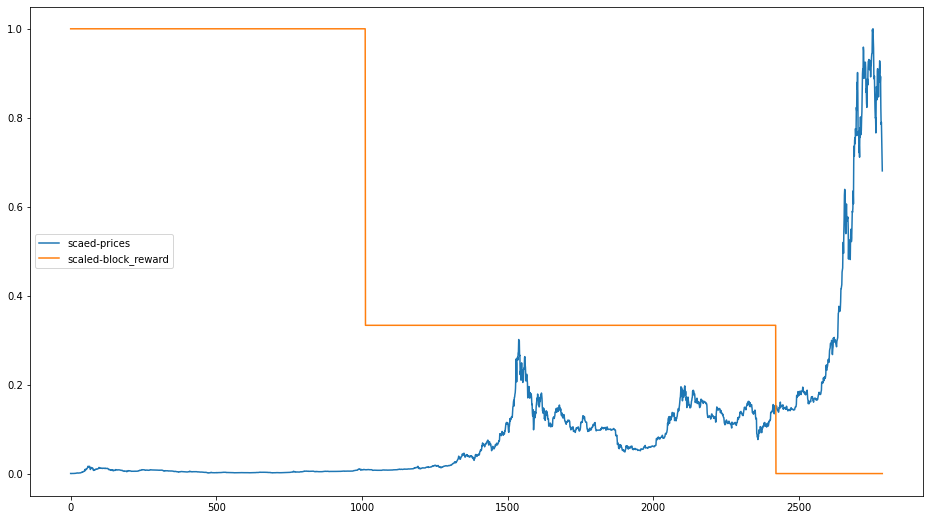

In [49]:
scaled_price_block_df.plot(figsize = (16,9))

## Making a windowed datatset with pandas

In [50]:
HORIZON = 1
WINDOW_SIZE = 7

In [51]:
bitcoin_prices_windowed = bitcoin_prices.copy()

In [52]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Prices+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods = i+1)

In [53]:
bitcoin_prices_windowed.head(10)

,Price,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.65499,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25.0,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25.0,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25.0,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25.0,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25.0,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25.0,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25.0,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25.0,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [54]:
X = bitcoin_prices_windowed.drop(columns = ['Price'], axis ='columns')
y = bitcoin_prices_windowed['Price']

In [55]:
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2 , shuffle = False)

In [56]:
len(X_train) , len(X_val) , len(y_train),len(y_val)

(2229, 558, 2229, 558)

In [113]:
#remove NAN,

bitcoin_prices_windowed.dropna(inplace = True)

In [115]:
bitcoin_prices_windowed = bitcoin_prices_windowed.astype(np.float32)

## Model_6 - Multivariate Dense model

In [124]:
model_6 = tf.keras.Sequential([
                               layers.Dense(128, activation = 'relu'),
                               layers.Dense(HORIZON , activation = 'linear')
], name = 'model_6_multivariate_model')

In [125]:
model_6.compile(loss = tf.keras.losses.mean_absolute_error,
                metrics = ['mae','mse'],
                optimizer = tf.keras.optimizers.Adam())

In [126]:
model_6.fit(x = X_train,
            y = y_train,
            epochs = 100,
            validation_data = (X_val,y_val),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
58/70 [=======================>......] - ETA: 0s - loss: 715.8026 - mae: 715.8026 - mse: 3166730.5000INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 12ms/step - loss: 635.9256 - mae: 635.9256 - mse: 2676376.7500 - val_loss: 1036.7311 - val_mae: 1036.7312 - val_mse: 3607996.2500
Epoch 2/100
64/70 [==========================>...] - ETA: 0s - loss: 183.2819 - mae: 183.2819 - mse: 175452.3438INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 178.6199 - mae: 178.6199 - mse: 167303.7344 - val_loss: 897.7679 - val_mae: 897.7679 - val_mse: 2676783.7500
Epoch 3/100
58/70 [=======================>......] - ETA: 0s - loss: 169.2615 - mae: 169.2615 - mse: 149007.1406INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 163.9719 - mae: 163.9719 - mse: 145399.7500 - val_loss: 813.9136 - val_mae: 813.9136 - val_mse: 2128721.7500
Epoch 4/100
64/70 [==========================>...] - ETA: 0s - loss: 146.6226 - mae: 146.6226 - mse: 113871.0703INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 145.3821 - mae: 145.3821 - mse: 110837.4844 - val_loss: 774.7632 - val_mae: 774.7632 - val_mse: 2005434.8750
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 138.3304 - mae: 138.3304 - mse: 104062.9688 - val_loss: 786.6065 - val_mae: 786.6065 - val_mse: 1842447.5000
Epoch 6/100
60/70 [========================>.....] - ETA: 0s - loss: 130.4576 - mae: 130.4576 - mse: 88411.2969INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 130.1520 - mae: 130.1520 - mse: 93663.3828 - val_loss: 719.0757 - val_mae: 719.0757 - val_mse: 1620585.2500
Epoch 7/100
63/70 [==========================>...] - ETA: 0s - loss: 135.8585 - mae: 135.8585 - mse: 100226.5156INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 135.5173 - mae: 135.5173 - mse: 96381.5859 - val_loss: 672.2898 - val_mae: 672.2898 - val_mse: 1480125.0000
Epoch 8/100
59/70 [========================>.....] - ETA: 0s - loss: 124.6320 - mae: 124.6320 - mse: 85402.6094INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 125.3629 - mae: 125.3629 - mse: 86019.0781 - val_loss: 644.5292 - val_mae: 644.5292 - val_mse: 1413222.8750
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 123.5533 - mae: 123.5533 - mse: 84105.8203 - val_loss: 840.2613 - val_mae: 840.2613 - val_mse: 1953550.0000
Epoch 10/100
59/70 [========================>.....] - ETA: 0s - loss: 131.9777 - mae: 131.9777 - mse: 88302.2422INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 137.0955 - mae: 137.0955 - mse: 96220.5000 - val_loss: 631.3043 - val_mae: 631.3043 - val_mse: 1382199.0000
Epoch 11/100
70/70 [==============================] - 0s 3ms/step - loss: 122.6850 - mae: 122.6850 - mse: 86501.6328 - val_loss: 632.0391 - val_mae: 632.0391 - val_mse: 1347490.6250
Epoch 12/100
70/70 [==============================] - 0s 4ms/step - loss: 128.6920 - mae: 128.6920 - mse: 89142.3984 - val_loss: 644.4886 - val_mae: 644.4886 - val_mse: 1412524.5000
Epoch 13/100
62/70 [=========================>....] - ETA: 0s - loss: 120.0160 - mae: 120.0160 - mse: 80933.0703INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 119.5724 - mae: 119.5724 - mse: 80475.4531 - val_loss: 609.4464 - val_mae: 609.4464 - val_mse: 1287660.3750
Epoch 14/100
70/70 [==============================] - 0s 4ms/step - loss: 129.3752 - mae: 129.3752 - mse: 89393.5938 - val_loss: 1141.9733 - val_mae: 1141.9733 - val_mse: 3055515.7500
Epoch 15/100
70/70 [==============================] - 0s 4ms/step - loss: 130.1991 - mae: 130.1991 - mse: 88804.9609 - val_loss: 630.0601 - val_mae: 630.0601 - val_mse: 1355394.2500
Epoch 16/100
56/70 [=======================>......] - ETA: 0s - loss: 116.5265 - mae: 116.5265 - mse: 77379.6875INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 116.6534 - mae: 116.6534 - mse: 77801.1875 - val_loss: 594.6705 - val_mae: 594.6705 - val_mse: 1254912.7500
Epoch 17/100
60/70 [========================>.....] - ETA: 0s - loss: 117.1442 - mae: 117.1442 - mse: 74106.3203INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 119.0467 - mae: 119.0467 - mse: 79135.5391 - val_loss: 587.9251 - val_mae: 587.9251 - val_mse: 1229236.0000
Epoch 18/100
70/70 [==============================] - 0s 3ms/step - loss: 125.1210 - mae: 125.1210 - mse: 80296.4688 - val_loss: 698.9402 - val_mae: 698.9402 - val_mse: 1534075.1250
Epoch 19/100
70/70 [==============================] - 0s 3ms/step - loss: 115.0374 - mae: 115.0374 - mse: 76247.6406 - val_loss: 593.5107 - val_mae: 593.5107 - val_mse: 1248383.3750
Epoch 20/100
70/70 [==============================] - 0s 3ms/step - loss: 117.8500 - mae: 117.8500 - mse: 76758.7734 - val_loss: 755.6996 - val_mae: 755.6996 - val_mse: 1642558.7500
Epoch 21/100
62/70 [=========================>....] - ETA: 0s - loss: 122.8340 - mae: 122.8340 - mse: 72499.4609INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 121.8028 - mae: 121.8028 - mse: 75691.0859 - val_loss: 582.9368 - val_mae: 582.9368 - val_mse: 1217459.8750
Epoch 22/100
70/70 [==============================] - 0s 3ms/step - loss: 114.2089 - mae: 114.2089 - mse: 74640.6562 - val_loss: 604.4672 - val_mae: 604.4672 - val_mse: 1247356.5000
Epoch 23/100
70/70 [==============================] - 0s 4ms/step - loss: 114.7512 - mae: 114.7512 - mse: 75951.1406 - val_loss: 628.1086 - val_mae: 628.1086 - val_mse: 1321135.7500
Epoch 24/100
70/70 [==============================] - 0s 3ms/step - loss: 113.1481 - mae: 113.1481 - mse: 73565.1094 - val_loss: 584.3190 - val_mae: 584.3190 - val_mse: 1203956.2500
Epoch 25/100
70/70 [==============================] - 0s 4ms/step - loss: 119.1169 - mae: 119.1169 - mse: 72848.7109 - val_loss: 611.6795 - val_mae: 611.6795 - val_mse: 1257296.2500
Epoch 26/100
63/70 [==========================>...] - ETA: 0s - loss: 120.2728 - mae: 120.2728 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 117.6388 - mae: 117.6388 - mse: 77814.0781 - val_loss: 572.1218 - val_mae: 572.1218 - val_mse: 1183489.2500
Epoch 27/100
70/70 [==============================] - 0s 3ms/step - loss: 114.5022 - mae: 114.5022 - mse: 73659.6641 - val_loss: 810.2361 - val_mae: 810.2361 - val_mse: 1856326.2500
Epoch 28/100
70/70 [==============================] - 0s 3ms/step - loss: 115.3532 - mae: 115.3532 - mse: 76019.1875 - val_loss: 600.1295 - val_mae: 600.1295 - val_mse: 1229317.7500
Epoch 29/100
61/70 [=========================>....] - ETA: 0s - loss: 113.8455 - mae: 113.8455 - mse: 73916.8125INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 11ms/step - loss: 117.1898 - mae: 117.1898 - mse: 78026.0938 - val_loss: 570.4129 - val_mae: 570.4129 - val_mse: 1171723.6250
Epoch 30/100
70/70 [==============================] - 0s 4ms/step - loss: 115.0275 - mae: 115.0275 - mse: 72787.0234 - val_loss: 583.5452 - val_mae: 583.5452 - val_mse: 1207078.7500
Epoch 31/100
70/70 [==============================] - 0s 4ms/step - loss: 112.5061 - mae: 112.5061 - mse: 72838.4844 - val_loss: 769.7704 - val_mae: 769.7704 - val_mse: 1667186.0000
Epoch 32/100
70/70 [==============================] - 0s 4ms/step - loss: 126.6803 - mae: 126.6803 - mse: 83273.3125 - val_loss: 577.7148 - val_mae: 577.7148 - val_mse: 1196642.2500
Epoch 33/100
57/70 [=======================>......] - ETA: 0s - loss: 117.1546 - mae: 117.1546 - mse: 78567.5078INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 14ms/step - loss: 117.6694 - mae: 117.6694 - mse: 76045.3203 - val_loss: 569.3299 - val_mae: 569.3299 - val_mse: 1165250.8750
Epoch 34/100
70/70 [==============================] - 0s 3ms/step - loss: 121.7262 - mae: 121.7262 - mse: 83839.7734 - val_loss: 642.7731 - val_mae: 642.7731 - val_mse: 1316810.2500
Epoch 35/100
70/70 [==============================] - 0s 3ms/step - loss: 108.9176 - mae: 108.9176 - mse: 70495.2969 - val_loss: 586.6050 - val_mae: 586.6050 - val_mse: 1213430.6250
Epoch 36/100
70/70 [==============================] - 0s 3ms/step - loss: 111.3511 - mae: 111.3511 - mse: 70716.8516 - val_loss: 855.0991 - val_mae: 855.0991 - val_mse: 1929221.1250
Epoch 37/100
70/70 [==============================] - 0s 4ms/step - loss: 116.6311 - mae: 116.6311 - mse: 73948.2969 - val_loss: 569.9123 - val_mae: 569.9123 - val_mse: 1170713.3750
Epoch 38/100
70/70 [==============================] - 0s 3ms/step - loss: 121.0690 - mae: 121.0690 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 111.9555 - mae: 111.9555 - mse: 72382.0000 - val_loss: 568.7162 - val_mae: 568.7162 - val_mse: 1167080.0000
Epoch 40/100
70/70 [==============================] - 0s 4ms/step - loss: 116.7899 - mae: 116.7899 - mse: 75465.4297 - val_loss: 743.6880 - val_mae: 743.6880 - val_mse: 1628328.6250
Epoch 41/100
70/70 [==============================] - 0s 4ms/step - loss: 111.5306 - mae: 111.5306 - mse: 71685.0391 - val_loss: 810.6560 - val_mae: 810.6560 - val_mse: 1858602.7500
Epoch 42/100
70/70 [==============================] - 0s 4ms/step - loss: 113.5490 - mae: 113.5490 - mse: 74382.8906 - val_loss: 587.4134 - val_mae: 587.4134 - val_mse: 1212215.1250
Epoch 43/100
70/70 [==============================] - 0s 4ms/step - loss: 111.1793 - mae: 111.1793 - mse: 72934.8750 - val_loss: 777.1782 - val_mae: 777.1782 - val_mse: 1738743.1250
Epoch 44/100
63/70 [==========================>...] - ETA: 0s - loss: 126.8536 - mae: 126.8536 - mse: 

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 126.1618 - mae: 126.1618 - mse: 81010.8672 - val_loss: 567.6676 - val_mae: 567.6676 - val_mse: 1161194.8750
Epoch 45/100
70/70 [==============================] - 0s 4ms/step - loss: 111.4021 - mae: 111.4021 - mse: 73894.5703 - val_loss: 573.3612 - val_mae: 573.3612 - val_mse: 1167557.7500
Epoch 46/100
70/70 [==============================] - 0s 4ms/step - loss: 120.3469 - mae: 120.3469 - mse: 80509.3984 - val_loss: 614.3456 - val_mae: 614.3456 - val_mse: 1245915.3750
Epoch 47/100
70/70 [==============================] - 0s 3ms/step - loss: 111.1734 - mae: 111.1734 - mse: 71563.8203 - val_loss: 597.6730 - val_mae: 597.6730 - val_mse: 1209696.2500
Epoch 48/100
70/70 [==============================] - 0s 3ms/step - loss: 132.0980 - mae: 132.0980 - mse: 84980.6484 - val_loss: 614.0049 - val_mae: 614.0049 - val_mse: 1245356.2500
Epoch 49/100
70/70 [==============================] - 0s 3ms/step - loss: 131.9534 - mae: 131.9534 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 118.5060 - mae: 118.5060 - mse: 75201.1484 - val_loss: 566.1036 - val_mae: 566.1036 - val_mse: 1154548.7500
Epoch 59/100
70/70 [==============================] - 0s 3ms/step - loss: 108.5978 - mae: 108.5978 - mse: 69508.6172 - val_loss: 577.0033 - val_mae: 577.0033 - val_mse: 1170691.8750
Epoch 60/100
70/70 [==============================] - 0s 4ms/step - loss: 108.4012 - mae: 108.4012 - mse: 68720.0469 - val_loss: 577.3286 - val_mae: 577.3286 - val_mse: 1181345.7500
Epoch 61/100
70/70 [==============================] - 0s 3ms/step - loss: 106.8576 - mae: 106.8576 - mse: 69668.3828 - val_loss: 611.8275 - val_mae: 611.8275 - val_mse: 1265710.0000
Epoch 62/100
70/70 [==============================] - 0s 4ms/step - loss: 109.3442 - mae: 109.3442 - mse: 69612.6953 - val_loss: 567.3757 - val_mae: 567.3757 - val_mse: 1149173.3750
Epoch 63/100
70/70 [==============================] - 0s 4ms/step - loss: 115.3515 - mae: 115.3515 - m

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 111.8163 - mae: 111.8163 - mse: 70393.6406 - val_loss: 564.0415 - val_mae: 564.0415 - val_mse: 1148797.0000
Epoch 66/100
70/70 [==============================] - 0s 4ms/step - loss: 109.3655 - mae: 109.3655 - mse: 70803.2734 - val_loss: 583.9634 - val_mae: 583.9634 - val_mse: 1181924.0000
Epoch 67/100
70/70 [==============================] - 0s 3ms/step - loss: 110.6150 - mae: 110.6150 - mse: 71577.6484 - val_loss: 591.4097 - val_mae: 591.4097 - val_mse: 1218161.7500
Epoch 68/100
60/70 [========================>.....] - ETA: 0s - loss: 108.4909 - mae: 108.4909 - mse: 68119.1016INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_model/assets


70/70 [==============================] - 1s 10ms/step - loss: 107.6327 - mae: 107.6327 - mse: 69295.5547 - val_loss: 563.0163 - val_mae: 563.0163 - val_mse: 1143893.1250
Epoch 69/100
70/70 [==============================] - 0s 4ms/step - loss: 110.1936 - mae: 110.1936 - mse: 70528.8047 - val_loss: 637.0519 - val_mae: 637.0519 - val_mse: 1294580.1250
Epoch 70/100
70/70 [==============================] - 0s 3ms/step - loss: 116.5037 - mae: 116.5037 - mse: 74778.1328 - val_loss: 692.1904 - val_mae: 692.1904 - val_mse: 1427578.6250
Epoch 71/100
70/70 [==============================] - 0s 4ms/step - loss: 110.2023 - mae: 110.2023 - mse: 70396.9453 - val_loss: 688.4343 - val_mae: 688.4343 - val_mse: 1415433.8750
Epoch 72/100
70/70 [==============================] - 0s 4ms/step - loss: 112.6656 - mae: 112.6656 - mse: 71395.7812 - val_loss: 663.8510 - val_mae: 663.8510 - val_mse: 1386761.0000
Epoch 73/100
70/70 [==============================] - 0s 4ms/step - loss: 110.4035 - mae: 110.4035 - m

In [127]:
model_6 = tf.keras.models.load_model('model_experiments/model_6_multivariate_model/')

In [128]:
model_6.evaluate(X_val,y_val)

18/18 [==============================] - 0s 2ms/step - loss: 563.0163 - mae: 563.0163 - mse: 1143893.1250


[563.0162963867188, 563.0162963867188, 1143893.125]

In [130]:
model_6_preds = model_6.predict(X_val)

In [132]:
model_6_results = time_series_metrics(y_true = tf.squeeze(y_val),
                                      y_pred = tf.squeeze(model_6_preds))

In [133]:
model_6_results

{'MAE': 563.01636,
 'MAPE': -0.024857074,
 'MASE': 0.9890638,
 'MSE': 1143893.1,
 'RMSE': 1069.5294,
 'sMAPE': 2.5036888,
 'sMAPE_2': 2.5092611}

In [134]:
baseline_results

{'MAE': 567.9802,
 'MAPE': 1.1418992,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362,
 'sMAPE': 2.5180576,
 'sMAPE_2': 2.516525}

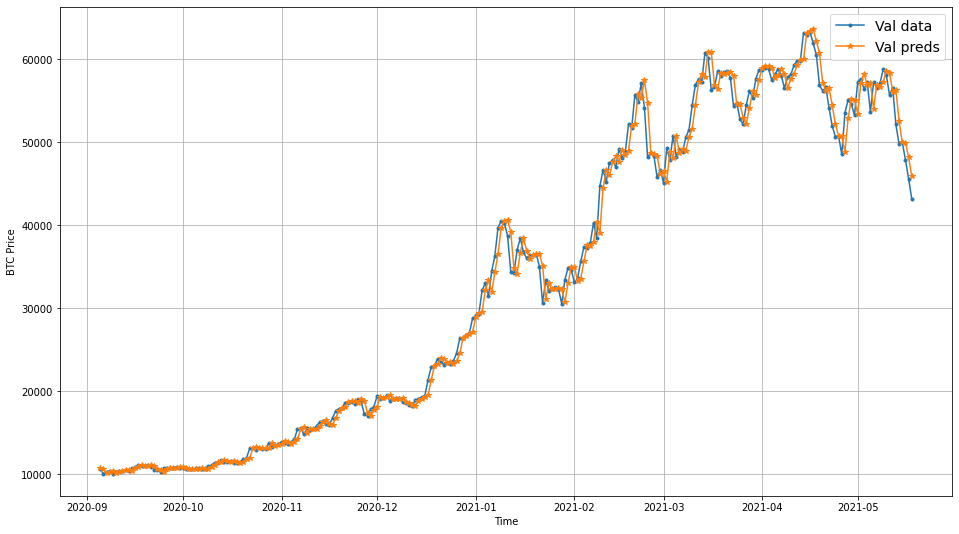

In [136]:
offset = 300
plt.figure(figsize=(16,9))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(X_val):],
                 values = val_labels[:,0],
                 start = offset,
                 label = 'Val data')
plot_time_series(timesteps = X_test[-len(X_val):],
                 values = model_6_preds,
                 start = offset,
                 format = '*',
                 label = 'Val preds')

##Model 7 :  N-Beats - Algorithmn

Reference : https://arxiv.org/pdf/1905.10437.pdf

In [57]:
#Create NBeatBlock custom layer
#subclassing reference : https://www.tensorflow.org/guide/keras/custom_layers_and_models

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size : int,
               theta_size : int,
               horizon : int,
               n_neurons : int,
               n_layers : int,
               **kwargs):
    
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    ##Block contains stack of 4 fully connected layers each has ReLu Activation

    self.hidden = [tf.keras.layers.Dense(n_neurons , activation = 'relu') for _ in range(n_layers)]
    #output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size , activation = 'linear' , name ='theta')

  def call(self,inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    #Output the backcast and the forecast from thetha

    backcast,forecast = theta[:,:self.input_size] , theta[:,-self.horizon:]
    return backcast,forecast

## Let's test our NBeatBlock class:

In [58]:
tf.random.set_seed(42)
# Set up dummy NBeatsBlock Layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE + HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [59]:
#Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1 , axis = 0)

In [60]:
backcast,forecast = dummy_nbeats_block_layer(dummy_inputs)

In [61]:
tf.squeeze(backcast.numpy()) # these are the cativation outputs of the theta layer

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([ 0.07960147,  0.32512042, -0.8428684 , -0.6938984 , -0.31720543,
       -0.56987345, -0.6396661 ], dtype=float32)>

In [62]:
tf.squeeze(forecast.numpy())

<tf.Tensor: shape=(), dtype=float32, numpy=1.007165>

## Preparing data for the N-BEATS algorithmn using tf.data

In [63]:
HORIZON = 1
WINDOW_SIZE = 7

In [64]:
#Create NBEATS data inputs
bitcoin_prices.drop(columns = 'block_reward', inplace = True)

In [65]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

In [66]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f'PRICES+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods = i+1)
bitcoin_prices_nbeats.head()

,Price,PRICES+1,PRICES+2,PRICES+3,PRICES+4,PRICES+5,PRICES+6,PRICES+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [67]:
bitcoin_prices_nbeats.dropna(inplace = True)

In [68]:
bitcoin_prices_nbeats.head(5)

,Price,PRICES+1,PRICES+2,PRICES+3,PRICES+4,PRICES+5,PRICES+6,PRICES+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [69]:
X = bitcoin_prices_nbeats.drop(columns = 'Price')
y = bitcoin_prices_nbeats.Price

In [70]:
X_train, X_val , y_train, y_val = train_test_split(X,y,test_size = 0.2,shuffle = False)

In [71]:
len(X_train) , len(X_val) , len(y_train) , len(y_val)

(2224, 556, 2224, 556)

In [72]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

val_features_dataset = tf.data.Dataset.from_tensor_slices(X_val)
val_labels_dataset = tf.data.Dataset.from_tensor_slices(y_val)

train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
val_dataset = tf.data.Dataset.zip((val_features_dataset,val_labels_dataset))

In [73]:
BATCHSIZE = 1024
train_dataset = train_dataset.batch(BATCHSIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCHSIZE).prefetch(tf.data.AUTOTUNE)

In [74]:
train_dataset,val_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

In [75]:
## Setting up hyperparameteres for NBEAT Algo
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = WINDOW_SIZE + HORIZON

### Getting ready for residual connection

reference : https://en.wikipedia.org/wiki/Vanishing_gradient_problem

https://en.wikipedia.org/wiki/Residual_neural_network

https://paperswithcode.com/method/resnet

In [191]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

In [194]:
subtracted = layers.subtract([tensor_1,tensor_2])
added = layers.add([tensor_1,tensor_2])

subtracted , added

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>)

### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer

2. Create an input layer for the N-BEATS stack

3. Make the initial backcast and forecast for the model with layer created in 1

4. Use for loop create stacks of block layers

5. Use the NBeatBlocks class within for loop to creat block which creates block level backcasts and forecast

6. Create the double residual stacking using subtract and add layers

7. Put the model inputs and outputs together using tf.keras.Model()

8. compile model with MAE as loss

9. Fit for 5000 epochs - 
* setup early stopping, 
* Reduce LR on plateau

In [221]:
%%time

tf.random.set_seed(42)

#1. setup instance of N-Beats block

nbeats_block_layer = NBeatsBlock(input_size = INPUT_SIZE,
                                 theta_size = THETA_SIZE,
                                 horizon = HORIZON,
                                 n_neurons = N_NEURONS,
                                 n_layers = N_LAYERS,
                                 name = 'InitialBlock')

#2 . Create input to stack
stack_input = layers.Input(shape = INPUT_SIZE , name = 'stack_input')

#3. Create initial backcast and forecast inputs (backwards predictions + forward predictions)
residuals , forecast = nbeats_block_layer(stack_input)

#4. Create stacks of block layers

for i , _ in enumerate(range(N_STACKS-1)): #first stack is already created in 3.
  #5. use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast,block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f'NBeatsBlock_{i}'
  )(residuals)

  #6. Create the double residual stacking
  residuals = layers.subtract([residuals,backcast] , name = f'subtract_{i}')
  forecast = layers.add([forecast,block_forecast], name = f'add_{i}')

#7. Put the model together
model_7 = tf.keras.Model(inputs = stack_input, outputs = forecast, name = 'model_7_NBeats')
#8. Compile the model with MAE Loss
model_7.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['mae','mse'])

model_7_history = model_7.fit(train_dataset,
                              epochs = N_EPOCHS,
                              validation_data = val_dataset,
                              verbose = 0,
                              callbacks = [tf.keras.callbacks.EarlyStopping(monitor ='val_loss',
                                                                            patience = 200,
                                                                            restore_best_weights = True),
                                          tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                                patience = 200,
                                                                                verbose = 1)])



Epoch 00961: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
CPU times: user 2min 45s, sys: 4.59 s, total: 2min 49s
Wall time: 3min 36s


In [222]:
model_7.evaluate(val_dataset)

1/1 [==============================] - 0s 22ms/step - loss: 579.4201 - mae: 579.4201 - mse: 1192294.6250


[579.4201049804688, 579.4201049804688, 1192294.625]

In [223]:
model_7_preds = model_7.predict(val_dataset)

In [224]:
model_7_results = time_series_metrics(y_true = tf.squeeze(y_val),
                                      y_pred = tf.squeeze(model_7_preds))

In [225]:
model_7_results

{'MAE': 579.4201,
 'MAPE': -0.014630035,
 'MASE': 1.0178807,
 'MSE': 1192294.6,
 'RMSE': 1091.9225,
 'sMAPE': 2.5963097,
 'sMAPE_2': 2.6081522}

### Plotting the N-BEATs architecture we've created

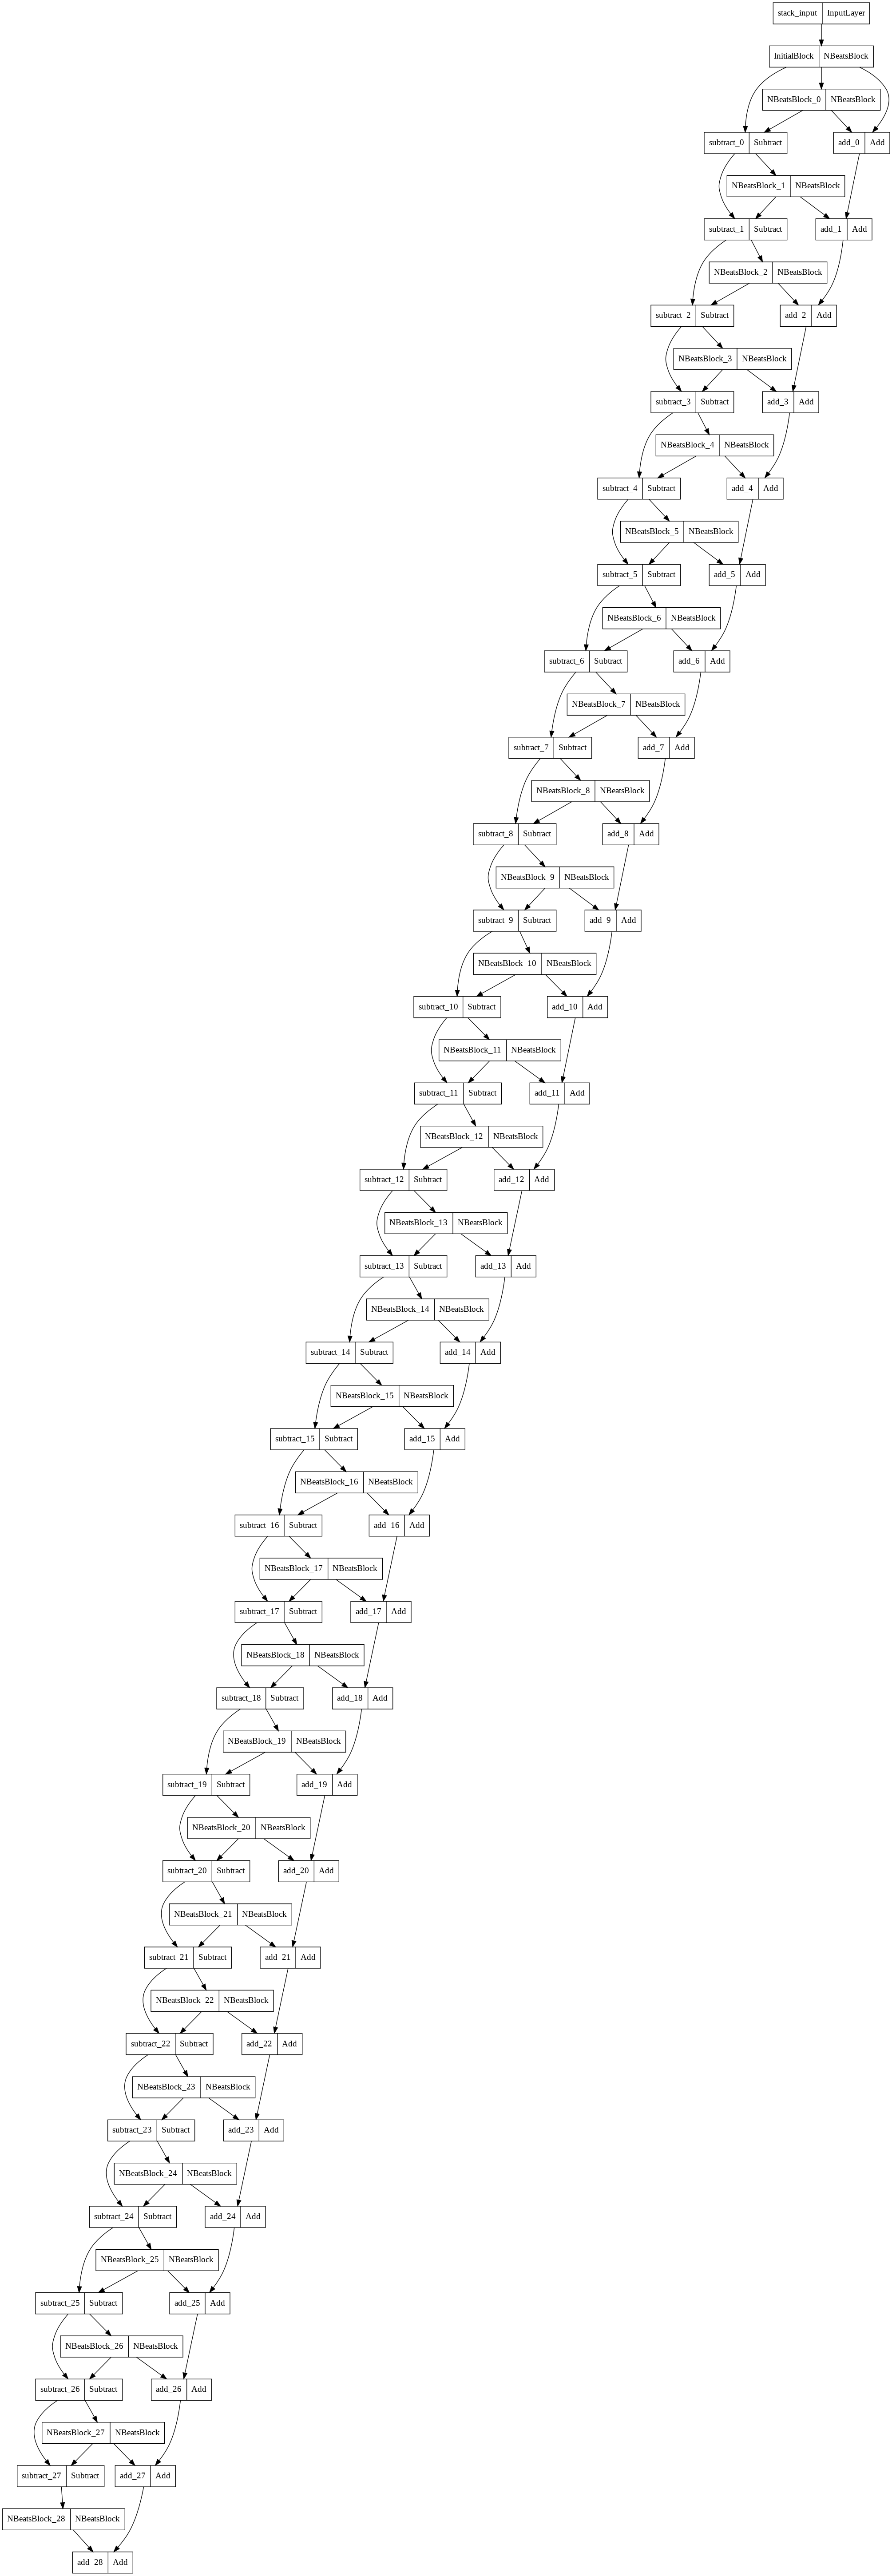

In [226]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

In [230]:
model_7_history_df = pd.DataFrame(model_7_history.history)

In [235]:
model_7_history_df['epoch'] = model_7_history.epoch

In [241]:
import seaborn as sns

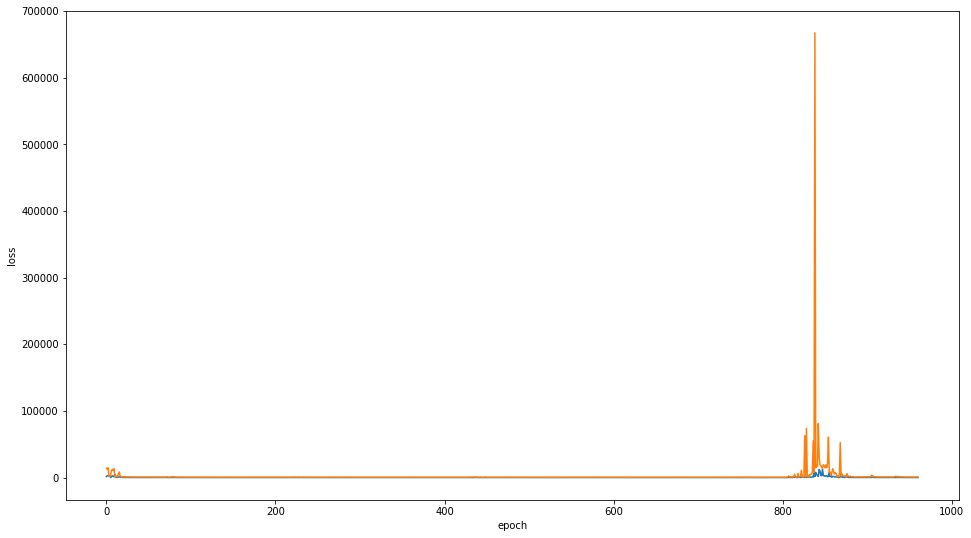

In [247]:
plt.figure(figsize = (16,9))
sns.lineplot(data = model_7_history_df , x = 'epoch' , y = 'loss' , legend = True)
sns.lineplot(data = model_7_history_df , x = 'epoch' , y = 'val_loss', legend = True)

## Model 8: Creating an ensemble

In [205]:
from tensorflow.keras import layers

In [206]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = val_dataset,
                        num_iter = 10,
                        num_epochs = 1000,
                        loss_fn = ['mae','mse','mape']):
  '''
  Returns a list of num_iter models each trained on MAE, MSE MAPE loss

  For example if num_iter = 10 a list of 30 trained models will be returned :
  10 * len (['mae','mse','mape'])
  '''

  ensemble_models = []

  for i in range(num_iter):
    #Build and fit a new model with a different loss function
    for loss_function in loss_fn:
      print(f'Optimizing model by reducingL {loss_function} for {num_epochs} epochs, model number : {i}')
      model = tf.keras.Sequential([
                                   layers.Dense(128,kernel_initializer = 'he_normal', activation = 'relu'),
                                   layers.Dense(128,kernel_initializer = 'he_normal', activation = 'relu'),
                                   layers.Dense(HORIZON)
      ])

      #compile simple model with current loss function
      model.compile(loss = loss_function,
                    optimizer = tf.keras.optimizers.Adam(),
                    metrics = ['mae','mse'])
      
      #fit the curent model
      model.fit(train_data,
                epochs = num_epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                  patience = 100,
                                                                  verbbose = 1)])
      ensemble_models.append(model)
  
  return ensemble_models

In [207]:
%%time
# Get list of trained ensemble_models

ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducingL mae for 1000 epochs, model number : 0


KeyboardInterrupt: ignored

In [ ]:
for model in ensemble_models:
  model.evaluate(val_dataset)

In [103]:
def make_ensember_preds(ensemble_models , data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [104]:
%%time

ensemble_preds = make_ensember_preds(ensemble_models , val_dataset)

CPU times: user 704 ms, sys: 19.8 ms, total: 724 ms
Wall time: 740 ms


In [132]:
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds , axis = 0)
  mean = tf.math.reduce_mean(preds, axis = 0)

  upper_bound = mean + 1.96*std 
  lower_bound = mean - 1.96*std

  return lower_bound , upper_bound

In [133]:
lower, upper = get_upper_lower(ensemble_preds)

In [114]:
model_8_median_results = time_series_metrics(y_true = y_val,
                                             y_pred = median_predictions)

In [118]:
model_8_mean_results  = time_series_metrics(y_true = y_val,
                                            y_pred = mean_predictions)

In [119]:
model_8_median_results

{'MAE': 569.11694,
 'MAPE': 0.23213637,
 'MASE': 0.99978083,
 'MSE': 1139711.4,
 'RMSE': 1067.5726,
 'sMAPE': 2.5677645,
 'sMAPE_2': 2.578373}

In [120]:
model_8_mean_results

{'MAE': 568.42804,
 'MAPE': 0.2591795,
 'MASE': 0.9985706,
 'MSE': 1140474.0,
 'RMSE': 1067.9298,
 'sMAPE': 2.5600643,
 'sMAPE_2': 2.5684943}

In [121]:
### plotting the prediction intervals (uncertainty estimates) of our ensemble

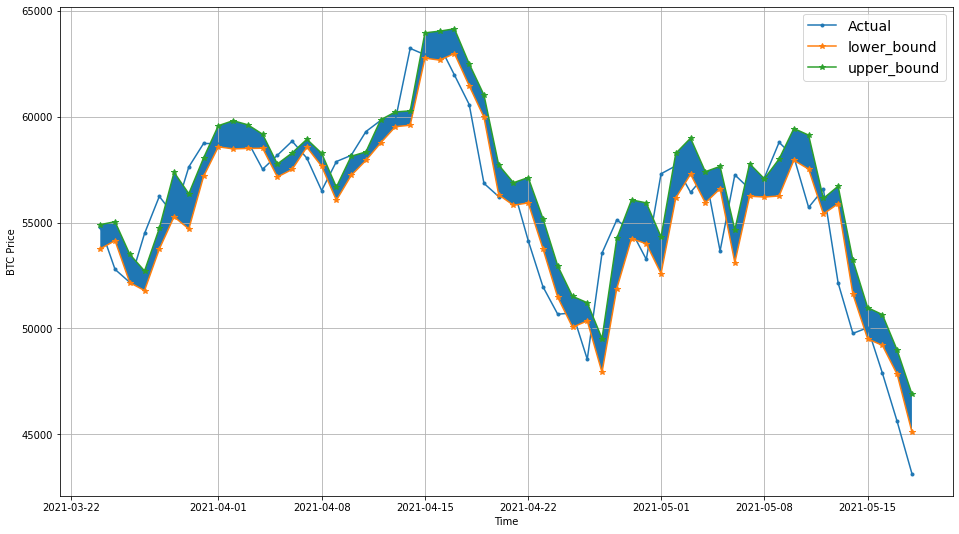

In [150]:
offset = 500
plt.figure(figsize=(16,9))
#Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps = X_test[-len(y_val):],
                 values = y_val[:],
                 start = offset,
                 label = 'Actual')
plot_time_series(timesteps = X_test[-len(y_val):],
                 values = lower,
                 start = offset,
                 format = '*',
                 label = 'lower_bound')
plot_time_series(timesteps = X_test[-len(y_val):],
                 values = upper,
                 start = offset,
                 format = '*',
                 label = 'upper_bound')
plt.fill_between(X_test[offset+2:],
                 (lower)[offset:],
                 (upper)[offset:]
                 )

In [149]:
len(X_test) , len(upper),len(lower)

(558, 556, 556)

Boot strapping for 95% confidence interval for our results.
1. Take the predictions from a number of randomly initilized model.
2. Measure the standard deviation of predictions
3. Multiply the standard deviation by 1.96 ( assuming normal distribution)
4. To get the prediction interval and add/subtract to the mean of the predictions made in (1)


reference : https://eng.uber.com/neural-networks-uncertainty-estimation/

## 2 types of uncertainty:

* Aleatoric uncertainity - this type of uncertainty cannot be reduced and is refered to as data uncertainity / subway uncertainity
* Epistemic uncertainity - this type of uncertainity can be reduced and is referred to model/coconut uncertainity

##Model 9: Train a model on the full historical data to make predictions into the future

In [152]:
bitcoin_prices_windowed

,Price,block_reward,Prices+1,Prices+2,Prices+3,Prices+4,Prices+5,Prices+6,Prices+7
Date,,,,,,,,,
2013-10-01,123.654990,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25.00,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25.00,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25.00,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25.00,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [200]:
bitcoin_prices.append()

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [208]:
#Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'] , axis = 1).to_numpy()
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [209]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_all)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_all)
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(1024).prefetch(tf.data.AUTOTUNE)

In [210]:
model_8 = tf.keras.Sequential([
                               layers.Dense(128, kernel_initializer='he_normal', activation = 'relu'),
                               layers.Dense(128, kernel_initializer='he_normal', activation = 'relu'),
                               layers.Dense(HORIZON , activation = 'linear')
], name = 'model_8')

In [211]:
model_8.compile(loss = tf.keras.losses.mean_absolute_error,
                metrics = ['mae','mse'],
                optimizer = tf.keras.optimizers.Adam())

In [212]:
model_8.fit(train_dataset,
            epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 3059.8352 - mae: 3059.8352 - mse: 57070120.0000
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 1749.0255 - mae: 1749.0254 - mse: 15826396.0000
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 559.9401 - mae: 559.9401 - mse: 1699656.0000
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 396.9591 - mae: 396.9591 - mse: 992671.1250
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 810.6705 - mae: 810.6705 - mse: 3324893.0000
Epoch 6/100
3/3 [==============================] - 0s 12ms/step - loss: 1226.8481 - mae: 1226.8481 - mse: 7319597.5000
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 441.5681 - mae: 441.5681 - mse: 1174887.0000
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 338.0468 - mae: 338.0468 - mse: 705633.4375
Epoch 9/100
3/3 [==============================] - 0s 10ms/s

In [176]:
model_8.predict(X_all[-1:])

array([[47270.65]], dtype=float32)

In [177]:
X_all[-1:]

array([[45604.61575361, 47885.62525472, 50032.69313676, 49764.1320816 ,
        52147.82118698, 56573.5554719 , 55715.54665129]])

In [201]:
  X_all = bitcoin_prices_windowed.dropna().drop(['Price','block_reward'] , axis = 1).to_numpy()
  y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [214]:
#Train model on entire data to make predictions for the next day
def make_future_forecasts(values,model,into_future,window_size = WINDOW_SIZE)-> list:
  future_forecast = []
  last_window = values[-window_size:]

  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window , axis = 0))
    print(f'Predicting on:\n {last_window}')
    print(f'Prediction: {tf.squeeze(future_pred).numpy()}')

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window,future_pred)[-window_size:]

  return future_forecast

In [215]:
INTO_FUTURE = 14
future_forecast = make_future_forecasts(values = y_all,
                                        model = model_8,
                                        into_future = INTO_FUTURE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086]
Prediction: 56245.35546875
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56245.35546875]
Prediction: 52955.46875
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56245.35546875 52955.46875   ]
Prediction: 51550.703125
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56245.35546875 52955.46875    51550.703125  ]
Prediction: 50024.05859375
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 56245.35546875
 52955.46875    51550.703125   50024.05859375]
Prediction: 50166.86328125
Predicting on:
 [45604.61575361 43144.47129086 56245.35546875 52955.46875
 51550.703125   50024.05859375 50166.86328125]
Prediction: 53125.359375
Predicting on:
 [43144.47129086 56245.35546875 52955.46875    51550.703125
 50024.05859375 50166.8632812

In [216]:
future_forecast

[56245.355,
 52955.47,
 51550.703,
 50024.06,
 50166.863,
 53125.36,
 44412.727,
 56340.926,
 53210.582,
 54411.062,
 51701.883,
 48327.887,
 58451.11,
 44779.766]

In [220]:
def get_future_dates(start_date , into_future , offset = 1):
  '''
  Returns array of datetime values ranging from start_date to start_date + into_future
  '''

  start_date = start_date + np.timedelta64(offset ,'D')
  end_date = start_date + np.timedelta64(into_future,'D')

  return np.arange(start_date,end_date , dtype = 'datetime64[D]')

In [225]:
 date_range = get_future_dates(bitcoin_prices.index[-1],
                               into_future = INTO_FUTURE)

In [245]:
date_range = np.insert(date_range , 0 , bitcoin_prices.index[-1])

In [249]:
future_forecast = np.insert(future_forecast , 0 , bitcoin_prices['Price'][-1])

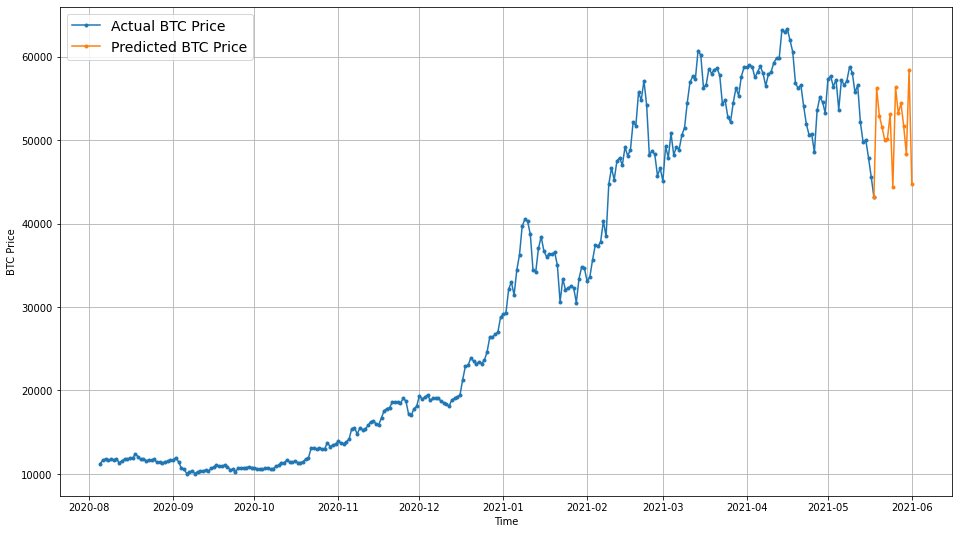

In [250]:
plt.figure(figsize = (16,9))
plot_time_series(bitcoin_prices.index, btc_price, start = 2500 ,label = 'Actual BTC Price')
plot_time_series(date_range,future_forecast ,label = 'Predicted BTC Price')

### Model 10: Why forecasting is BS

In [251]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] =  btc_price_turkey[-1]/100

In [257]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

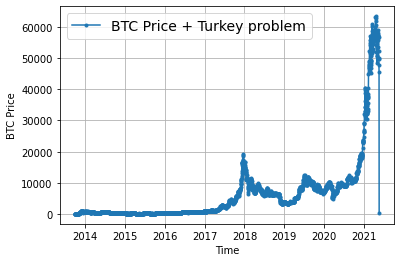

In [259]:
plot_time_series(btc_timesteps_turkey , btc_price_turkey , label = 'BTC Price + Turkey problem')

In [261]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [264]:
X_train , X_val , y_train , y_val = make_train_test_splits(x = np.array(btc_price_turkey))

In [269]:
model_10 = tf.keras.Sequential([layers.Dense(128, activation = 'relu'),
                                layers.Dense(HORIZON)
], name = 'model_10')

In [266]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
train_dataset = tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))

val_features_dataset = tf.data.Dataset.from_tensor_slices(X_val)
val_labels_dataset = tf.data.Dataset.from_tensor_slices(y_val)
val_dataset = tf.data.Dataset.zip((val_features_dataset,val_labels_dataset))

train_dataset = train_dataset.batch(BATCHSIZE).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(BATCHSIZE).prefetch(tf.data.AUTOTUNE)

In [271]:
model_10.compile(loss = tf.keras.losses.mean_absolute_error,
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['mae','mse'])

In [272]:
model_10.fit(train_dataset,
             epochs = 100,
             validation_data = val_dataset,
             callbacks = [create_model_checkpoint(model_name = model_10.name)])

Epoch 1/100
3/3 [==============================] - 1s 464ms/step - loss: 4476.9038 - mae: 4476.9038 - mse: 48068932.0000 - val_loss: 26604.6562 - val_mae: 26604.6562 - val_mse: 1247541120.0000
Epoch 2/100
3/3 [==============================] - 1s 332ms/step - loss: 4039.9417 - mae: 4039.9417 - mse: 39184504.0000 - val_loss: 23880.2930 - val_mae: 23880.2930 - val_mse: 1005822848.0000
Epoch 3/100
3/3 [==============================] - 1s 328ms/step - loss: 3601.6313 - mae: 3601.6313 - mse: 31122862.0000 - val_loss: 21094.0117 - val_mae: 21094.0117 - val_mse: 785620800.0000
Epoch 4/100
3/3 [==============================] - 1s 326ms/step - loss: 3158.5620 - mae: 3158.5620 - mse: 23930446.0000 - val_loss: 18308.5312 - val_mae: 18308.5312 - val_mse: 592000576.0000
Epoch 5/100
3/3 [==============================] - 1s 334ms/step - loss: 2717.6919 - mae: 2717.6919 - mse: 17728754.0000 - val_loss: 15598.3760 - val_mae: 15598.3760 - val_mse: 429668800.0000
Epoch 6/100
3/3 [=====================

In [277]:
model_10 = tf.keras.models.load_model('model_experiments/model_10')

In [278]:
preds = model_10.predict(val_dataset)

In [280]:
model_10_results = time_series_metrics(y_true = y_val,
                                       y_pred = tf.squeeze(preds))

In [281]:
model_10_results

{'MAE': 17027.697,
 'MAPE': -231973.4,
 'MASE': 26.350418,
 'MSE': 609463100.0,
 'RMSE': 24687.307,
 'sMAPE': 67.8044,
 'sMAPE_2': 119.99664}

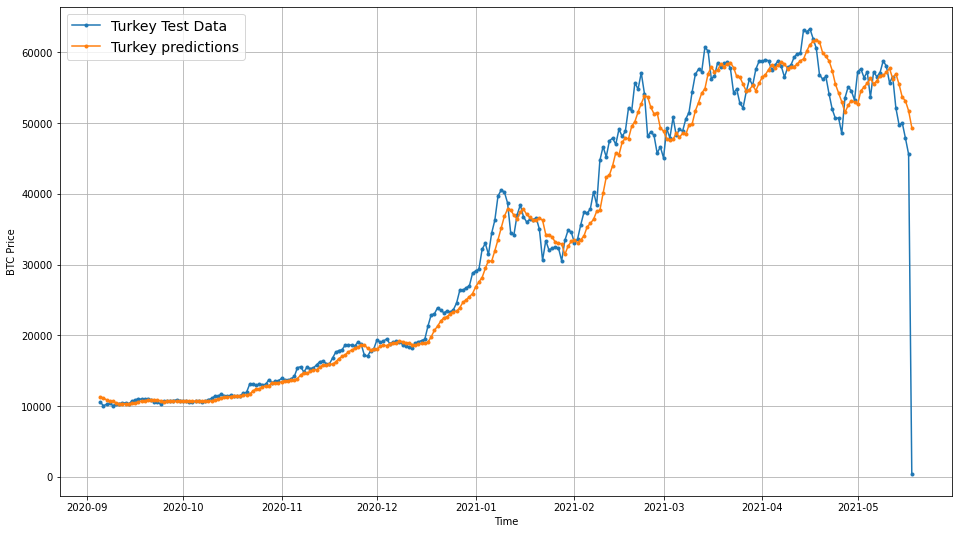

In [284]:
offset = 300
plt.figure(figsize=(16,9))
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_val):],
                 values = btc_price_turkey[-len(y_val):],
                 label = 'Turkey Test Data',
                 start = offset)
plot_time_series(timesteps = btc_timesteps_turkey[-len(X_val):],
                 values = tf.squeeze(preds),
                 label = 'Turkey predictions',
                 start = offset)

In [286]:
# model_results = pd.DataFrame({'naive_model':baseline_results,
#                               'model_1_w7_h1': model_1_results,
#                               'model_2_w30_h1':model_2_results,
#                               'model_3_w30_h1':model_3_results,
#                               })